# Kaggle Dataset: Advance Regression Techniques

##  Data Loading

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 


In [76]:
#reading dataset
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [77]:
#copying dataset
train_df = train_data.copy()
test_df = test_data.copy()

In [78]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [79]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## Exploratory Data Analysis (EDA)

####  Understanding Variables and DataFrame

In [82]:
train_df.shape

(1460, 81)

In [83]:
test_df.shape

(1459, 80)

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Data Pre-Processing or Data Cleaning

In [87]:
#count of missing values in columns having any missing values
train_df[train_df.columns[train_df.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [88]:
#percentage of missing values in columns having any missing values
((train_df[train_df.columns[train_df.isnull().any()]].isnull().sum()* 100)/(len(train_df)))

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [89]:
#count of missing values in columns having any missing values
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [90]:
#percentage of missing values in columns having any missing values
((test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()* 100)/(len(test_df)))

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [91]:
#dropping columns which have more than 20% missing values.
train_df.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [92]:
#dropping columns which have more than 20% missing values.
test_df.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [93]:
#replacing missing values with median or mode according to their datatypes for train data

train_missing = train_df.columns[train_df.isnull().any()]
missing_obj = []
missing_not_obj = []

for i in train_missing:
    if train_df[i].dtypes == object:
        missing_obj.append(i)
    else:
        missing_not_obj.append(i)
        
for i in missing_obj:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

for i in missing_not_obj:
    train_df[i] = train_df[i].fillna(train_df[i].median())

In [94]:
#replacing missing values with median or mode according to their datatypes.

test_missing = test_df.columns[test_df.isnull().any()]
missing_obj = []
missing_not_obj = []

for i in test_missing:
    if test_df[i].dtypes == object:
        missing_obj.append(i)
    else:
        missing_not_obj.append(i)
        
for i in missing_obj:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])

for i in missing_not_obj:
    test_df[i] = test_df[i].fillna(test_df[i].median())

### Dividing columns on the basis of datatypes

In [96]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

In [97]:
## Id is nothing but a serial number which will never affect our target variable.

train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

In [98]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [99]:
cols_num = [] #numerical columns
cols_obj = [] #object columns

for i in train_df.columns:
    if i in year_cols:
        pass
    elif train_df[i].dtypes == object:
        cols_obj.append(i)
    else:
        cols_num.append(i)

In [100]:
cols_num_dis = [] # discrete numerical values
cols_num_con = [] # continuous numerical values

for i in cols_num:
    if train_df[i].nunique()>12:
        cols_num_con.append(i)
    else:
        cols_num_dis.append(i)

### a) Handling Continuous Numerical Variables

In [102]:
train_df[cols_num_con].head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          60         65.0     8450       196.0         706           0   
1          20         80.0     9600         0.0         978           0   
2          60         68.0    11250       162.0         486           0   
3          70         60.0     9550         0.0         216           0   
4          60         84.0    14260       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000

### Skewness, Kurtosis and Outliers

In [104]:
for i in cols_num_con:
    skewness = round(train_df[i].skew(), 2)  
    kurtosis = round(train_df[i].kurtosis(), 2)  
    print(f'For {i} Skewness is {skewness} and Kurtosis is {kurtosis}')


For MSSubClass Skewness is 1.41 and Kurtosis is 1.58
For LotFrontage Skewness is 2.41 and Kurtosis is 21.91
For LotArea Skewness is 12.21 and Kurtosis is 203.24
For MasVnrArea Skewness is 2.68 and Kurtosis is 10.14
For BsmtFinSF1 Skewness is 1.69 and Kurtosis is 11.12
For BsmtFinSF2 Skewness is 4.26 and Kurtosis is 20.11
For BsmtUnfSF Skewness is 0.92 and Kurtosis is 0.47
For TotalBsmtSF Skewness is 1.52 and Kurtosis is 13.25
For 1stFlrSF Skewness is 1.38 and Kurtosis is 5.75
For 2ndFlrSF Skewness is 0.81 and Kurtosis is -0.55
For LowQualFinSF Skewness is 9.01 and Kurtosis is 83.23
For GrLivArea Skewness is 1.37 and Kurtosis is 4.9
For GarageArea Skewness is 0.18 and Kurtosis is 0.92
For WoodDeckSF Skewness is 1.54 and Kurtosis is 2.99
For OpenPorchSF Skewness is 2.36 and Kurtosis is 8.49
For EnclosedPorch Skewness is 3.09 and Kurtosis is 10.43
For 3SsnPorch Skewness is 10.3 and Kurtosis is 123.66
For ScreenPorch Skewness is 4.12 and Kurtosis is 18.44
For MiscVal Skewness is 24.48 and 

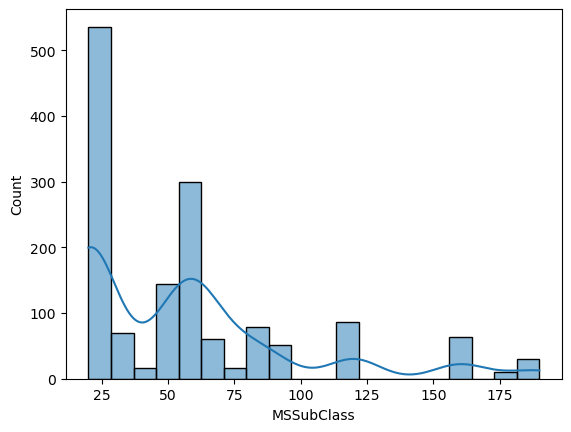

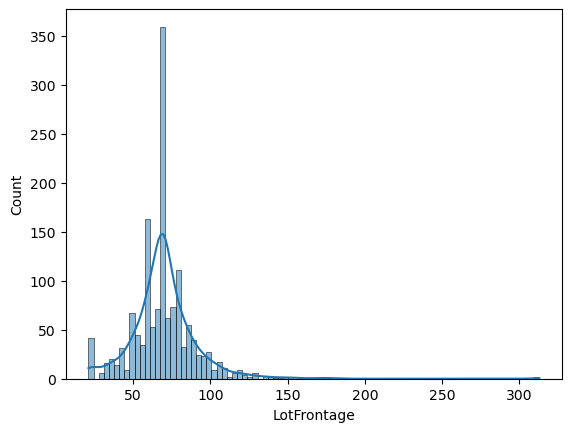

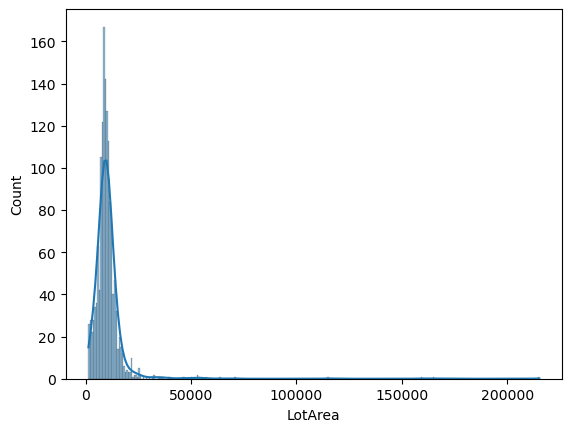

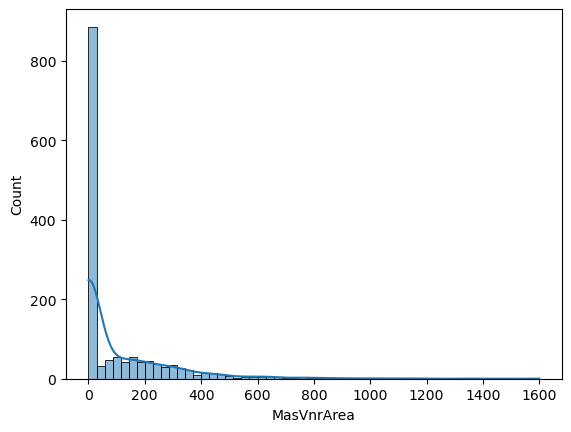

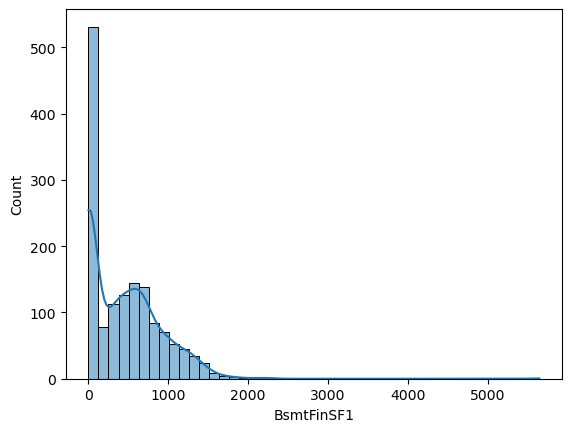

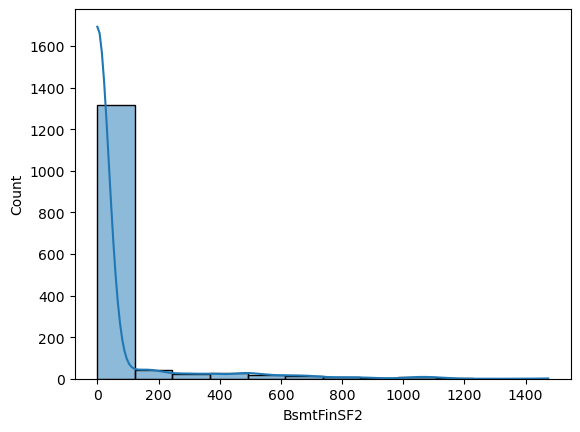

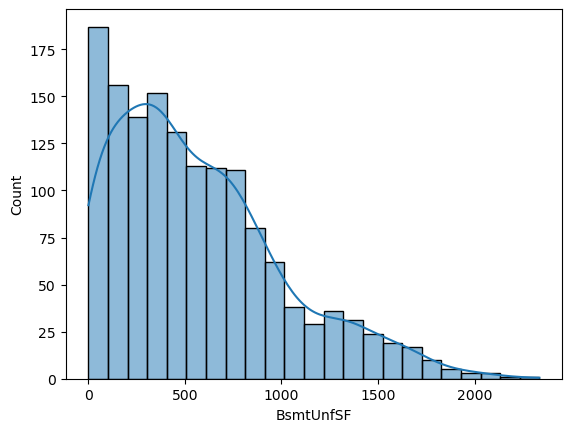

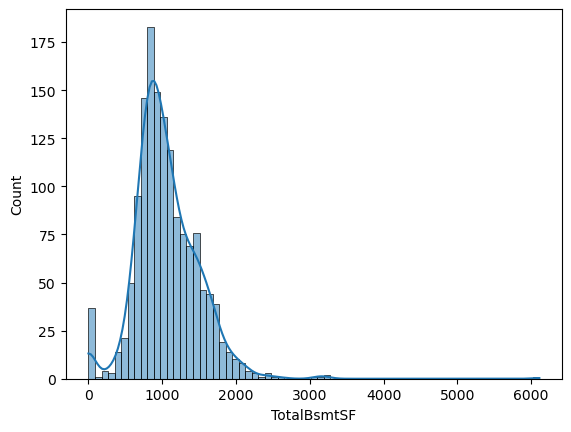

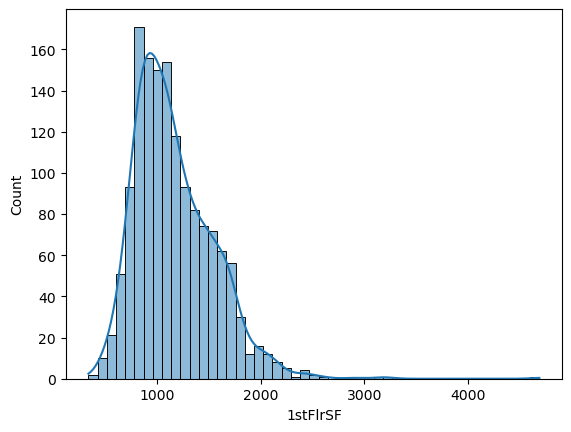

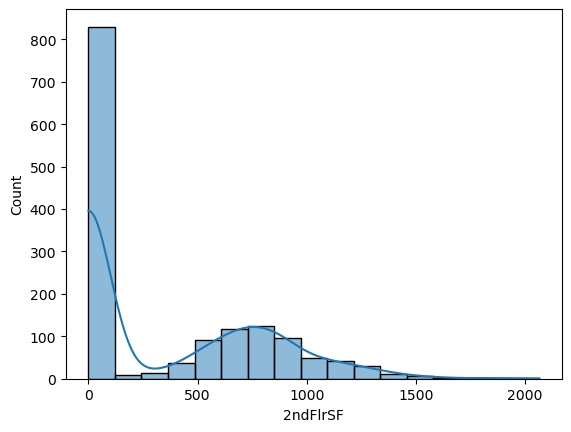

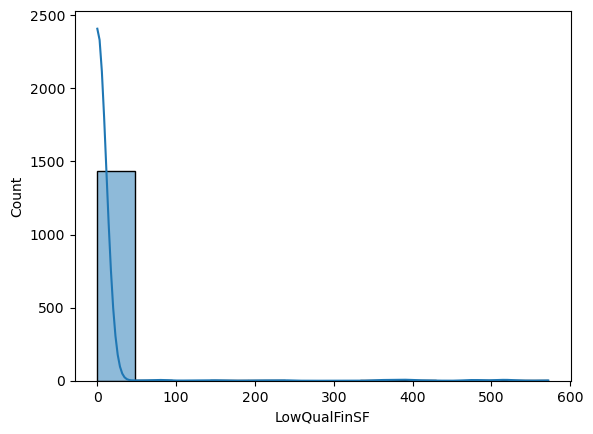

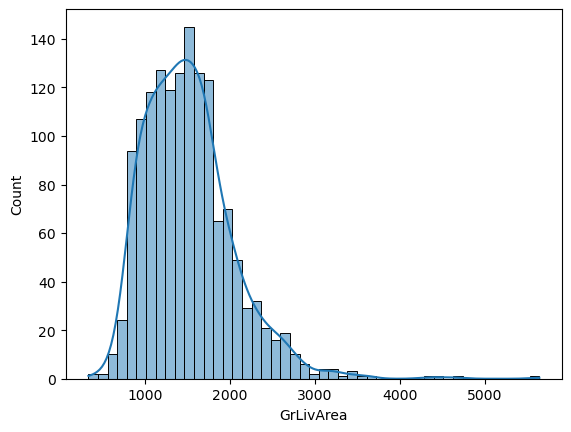

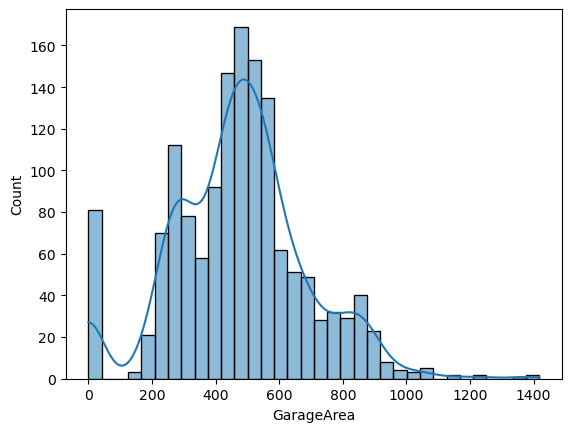

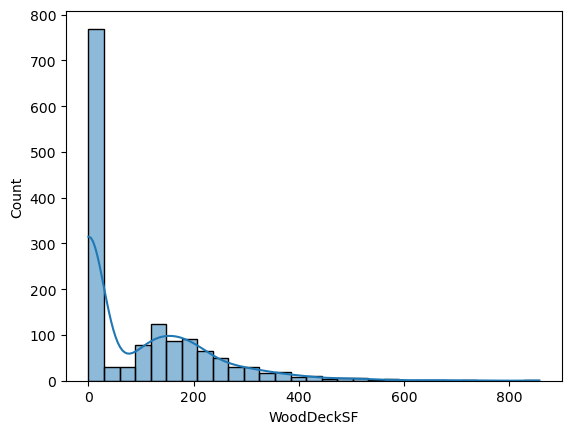

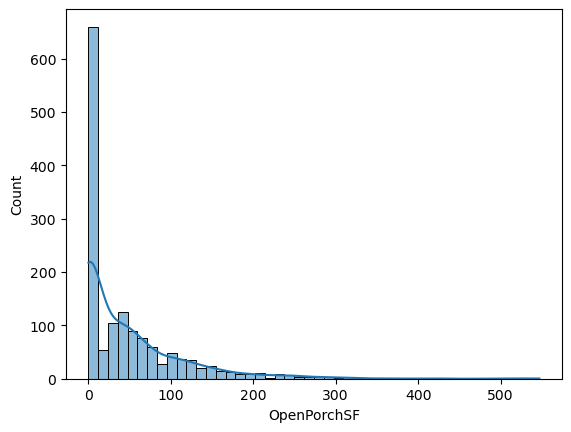

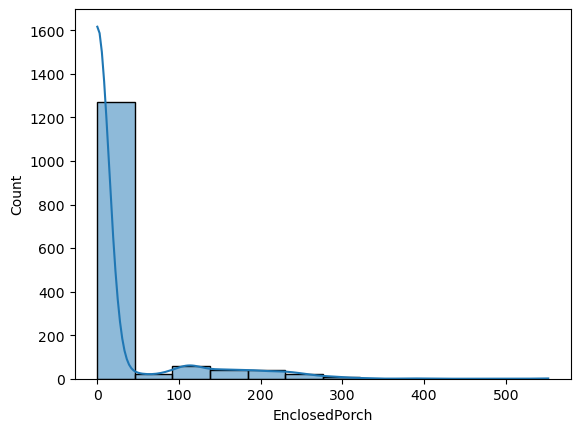

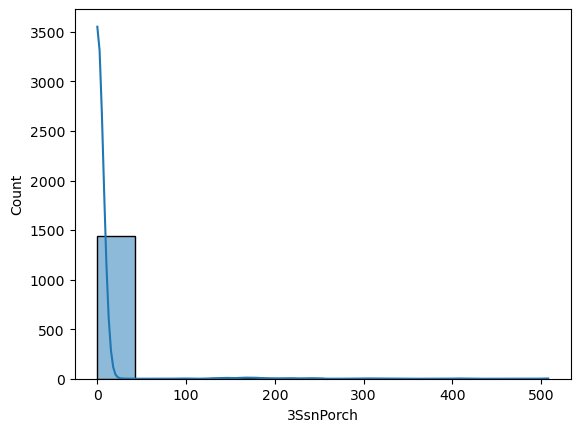

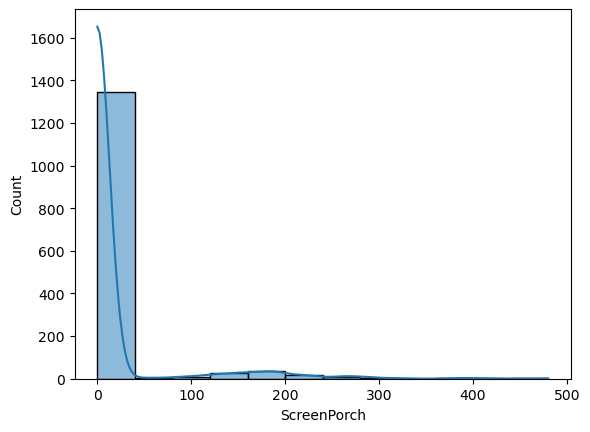

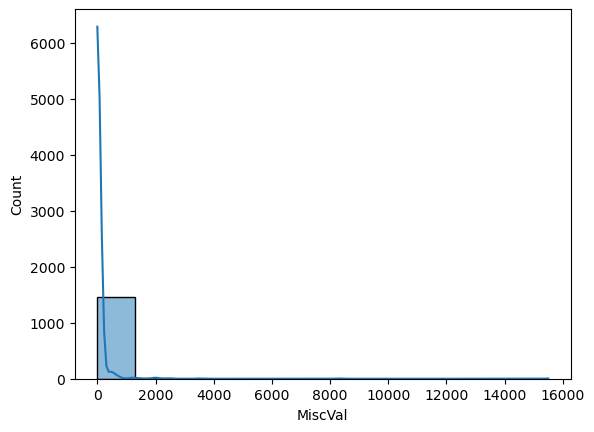

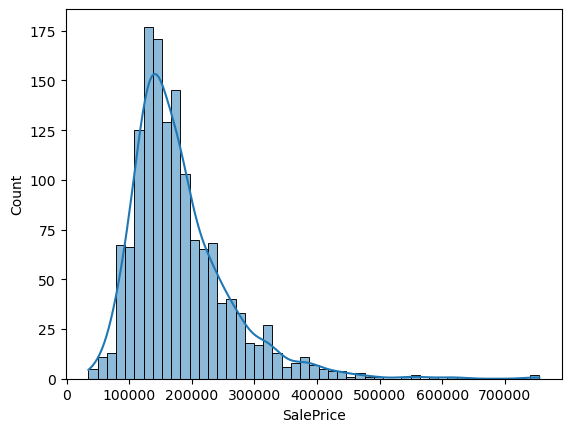

In [105]:
#plotting histplot for dataset to check skewness.
for i in cols_num_con:
    sns.histplot(train_df[i], kde=True)
    plt.show()

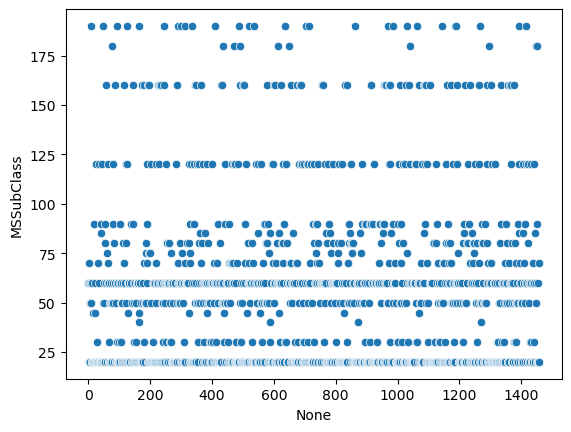

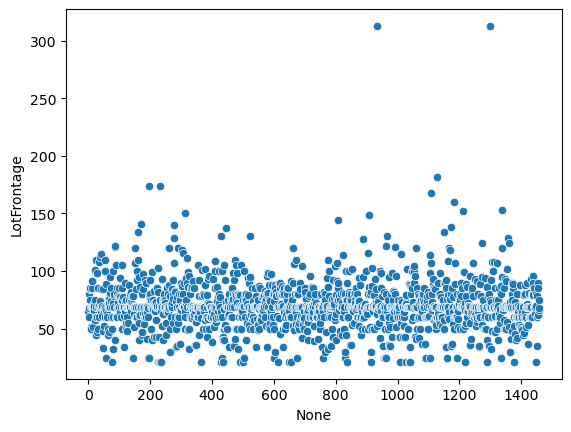

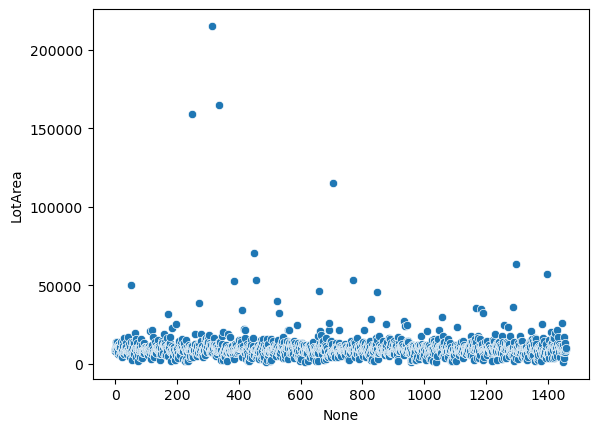

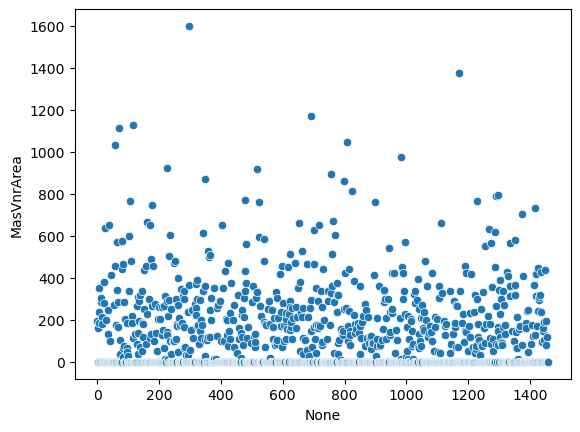

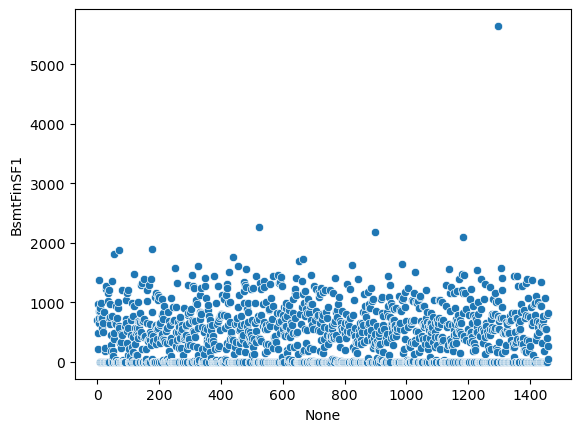

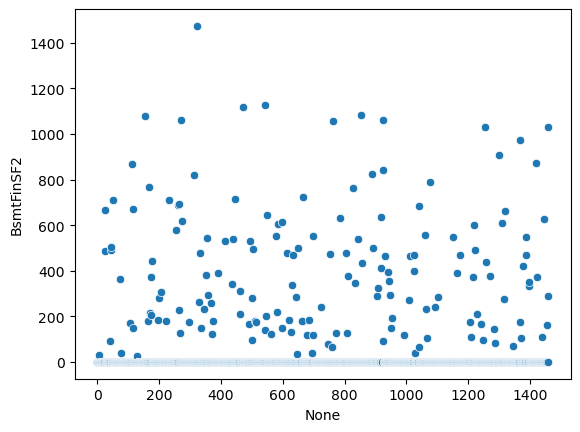

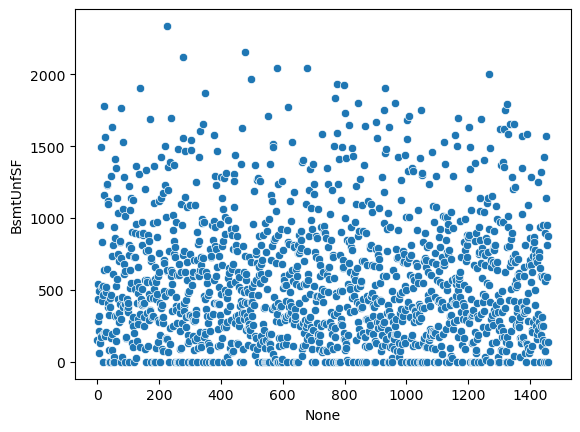

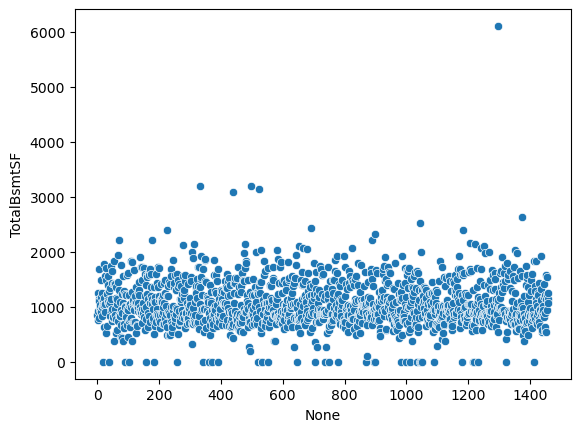

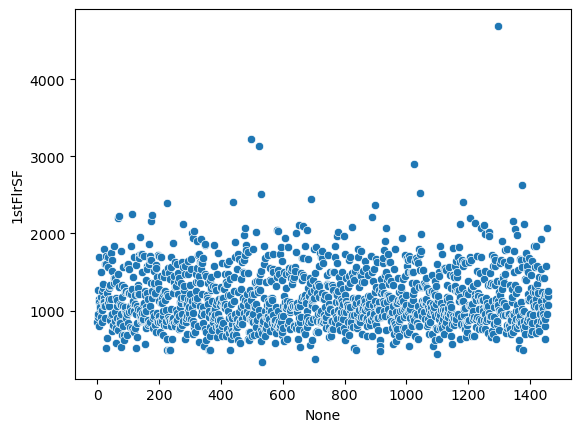

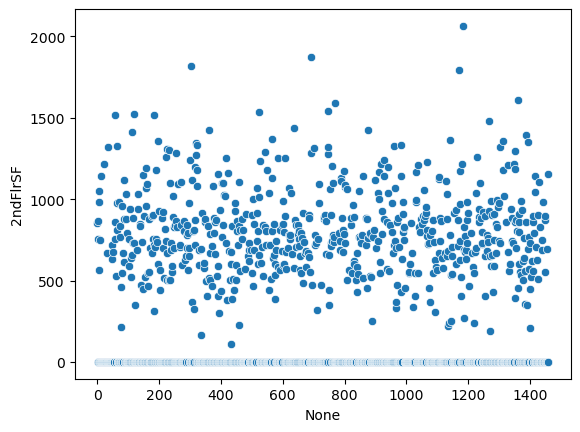

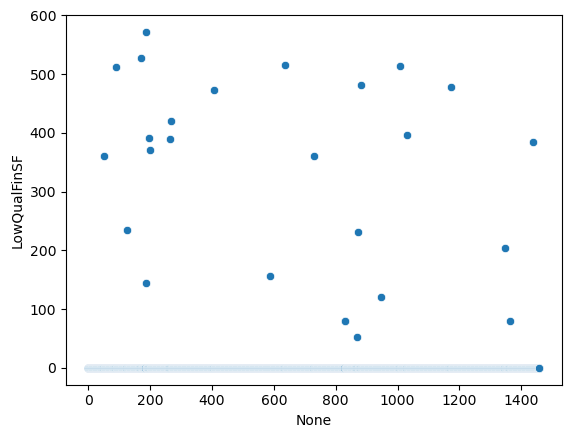

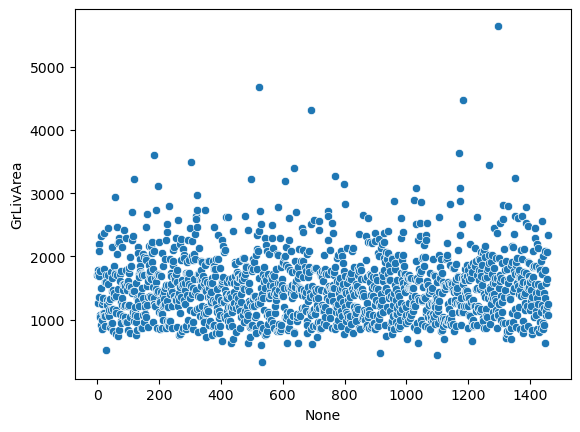

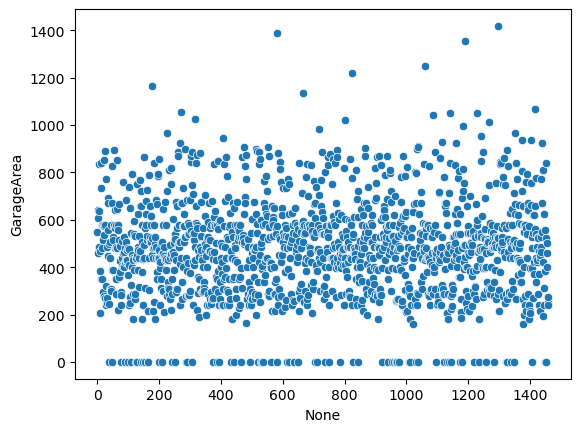

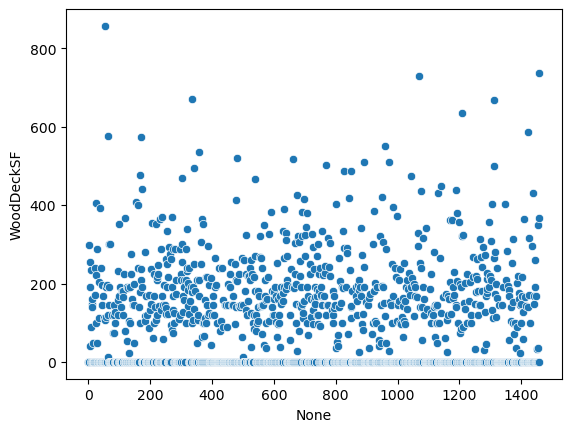

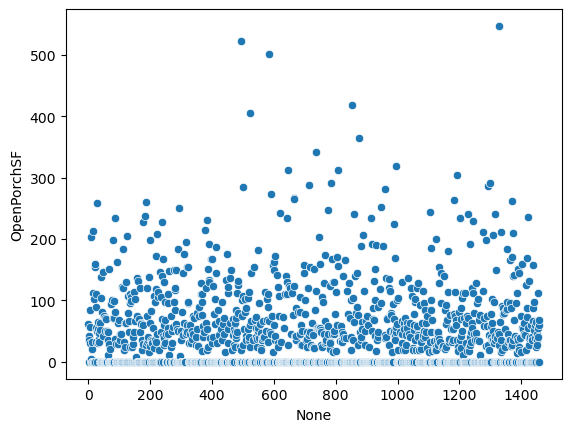

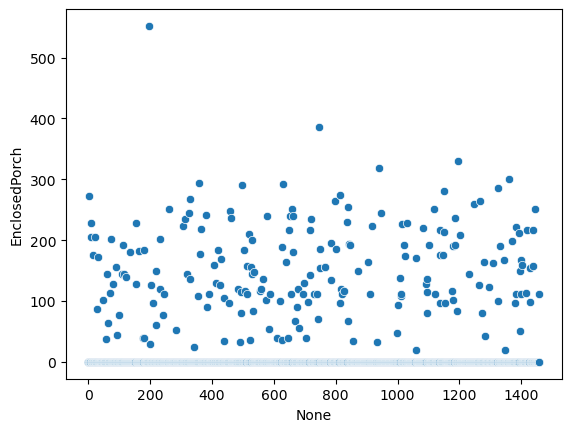

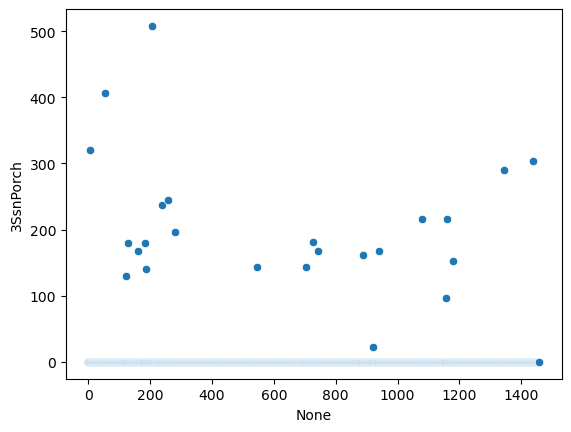

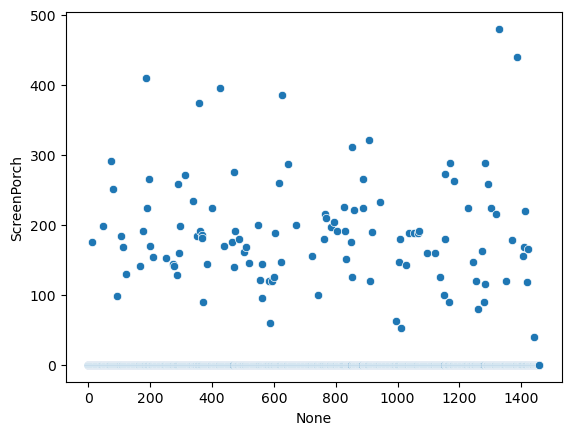

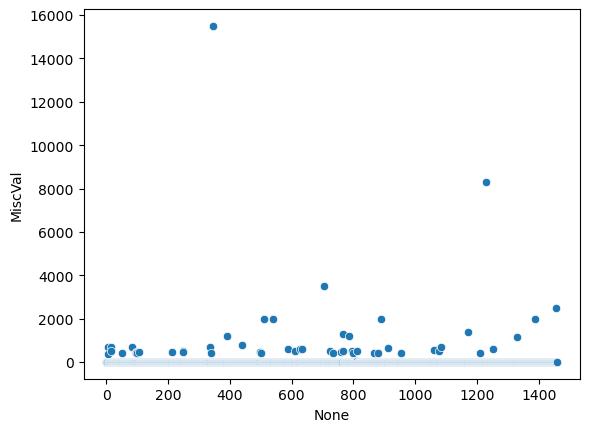

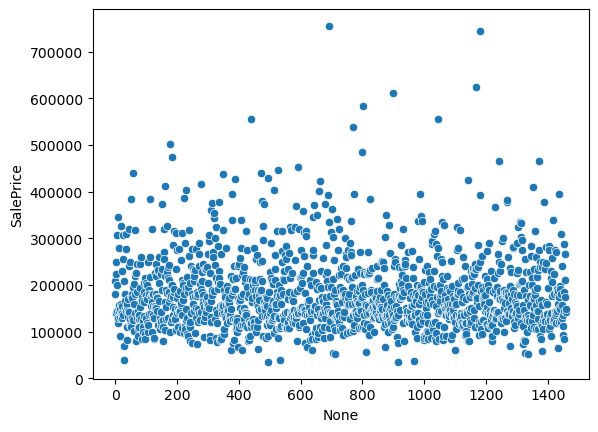

In [106]:
#plotting scatter-plot for a dataset to check outliers.
for i in cols_num_con:
    sns.scatterplot(data=train_df, x=train_df[i].index, y=i)
    plt.show()

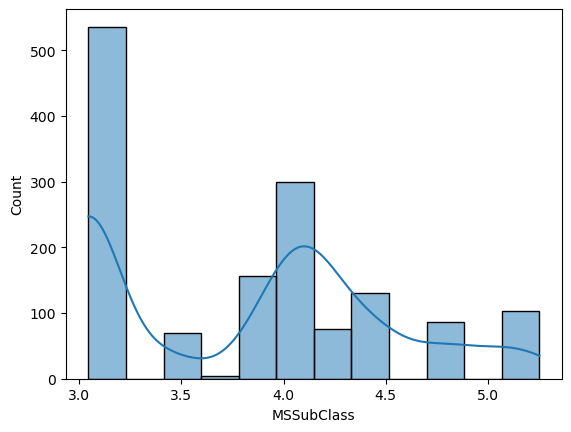

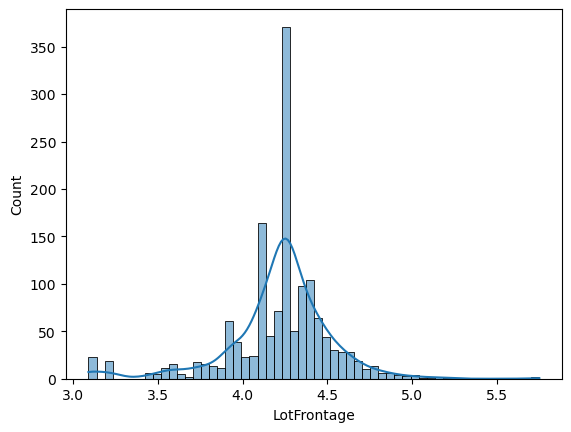

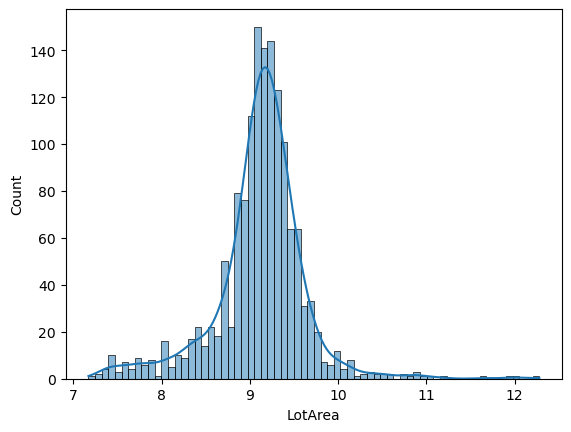

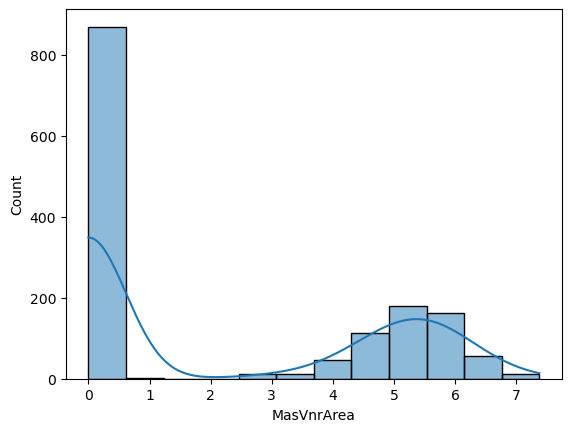

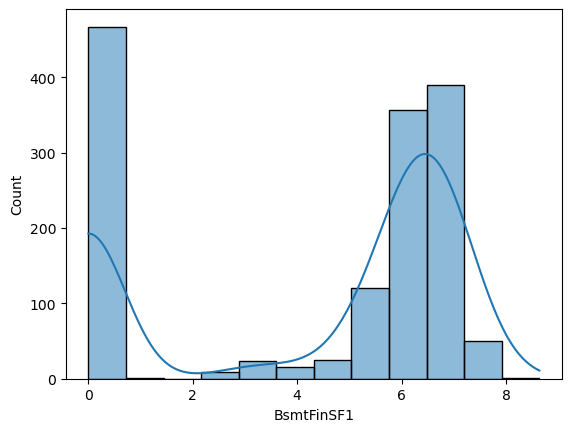

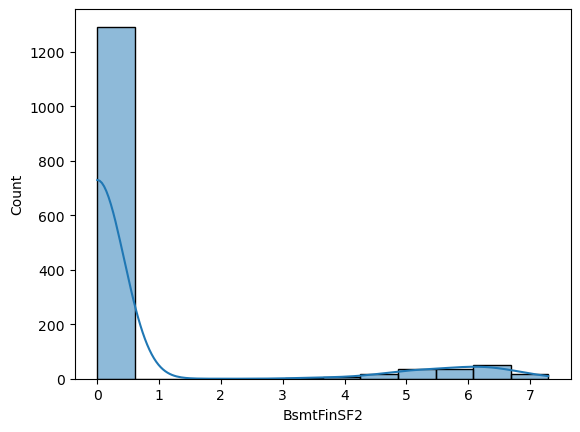

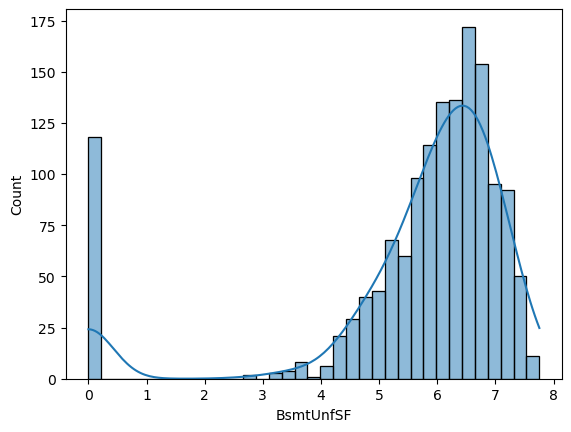

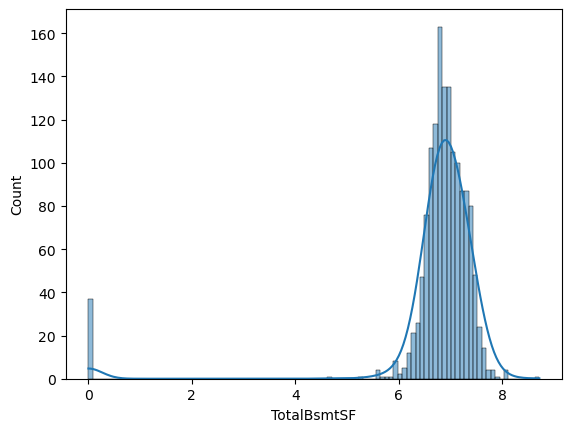

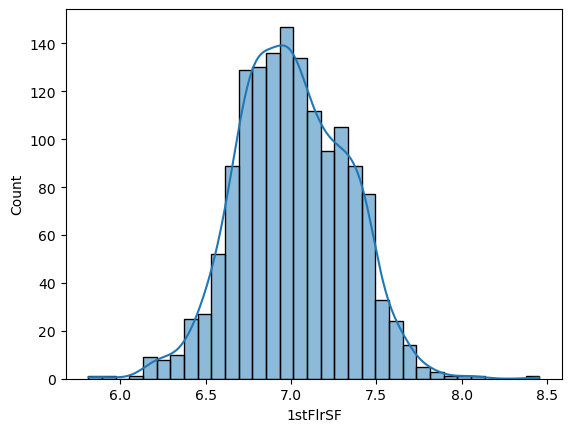

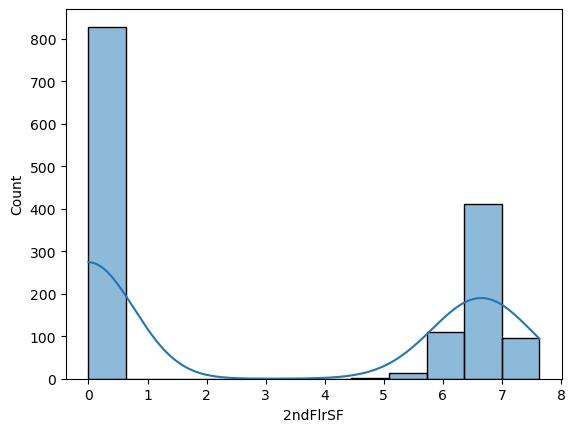

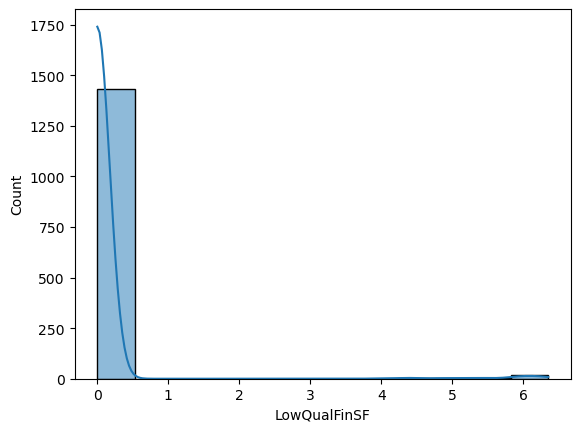

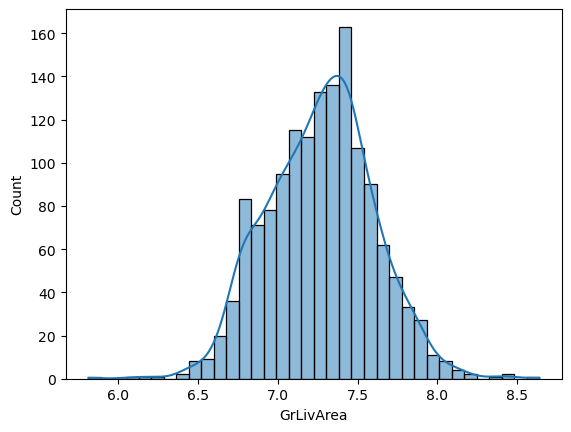

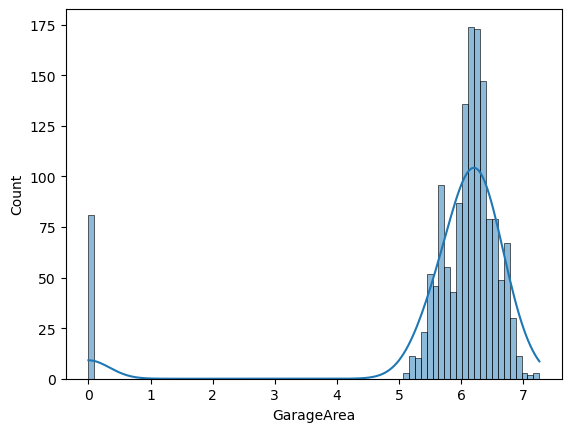

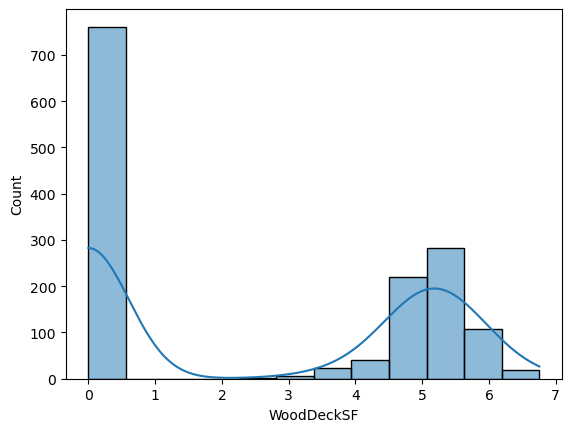

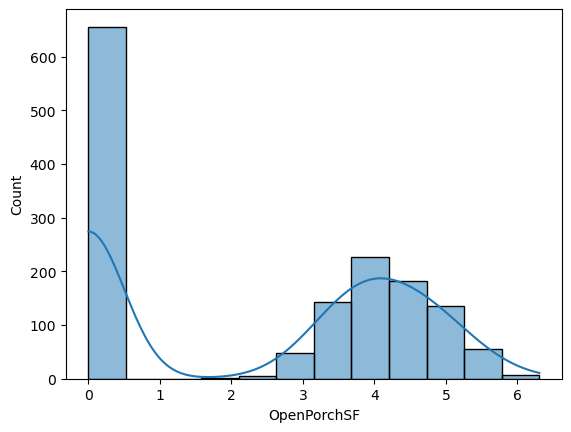

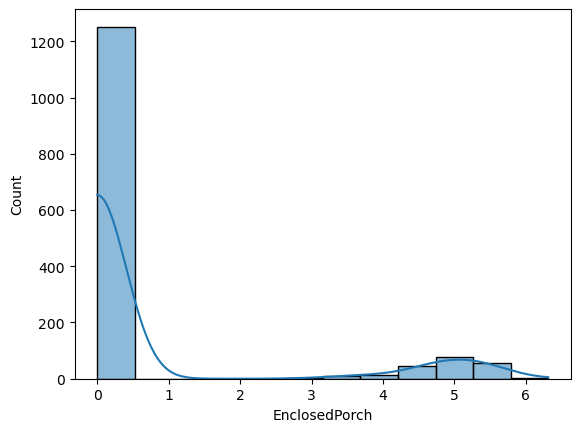

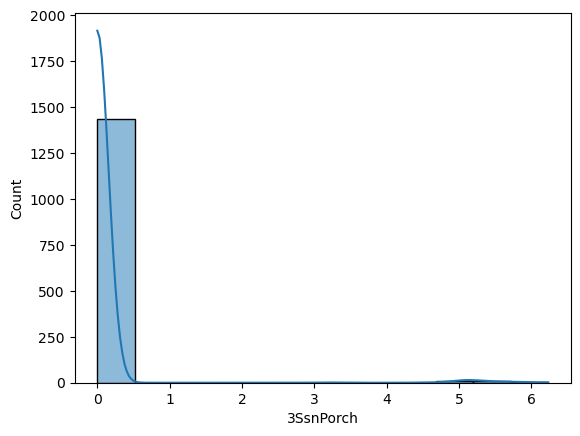

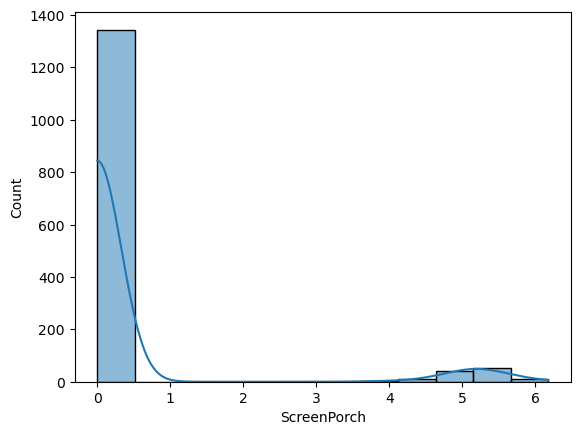

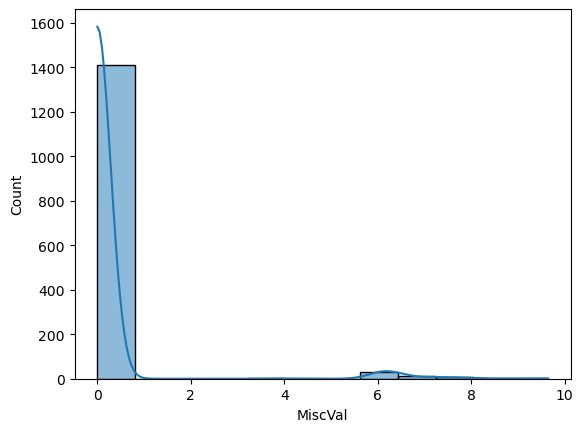

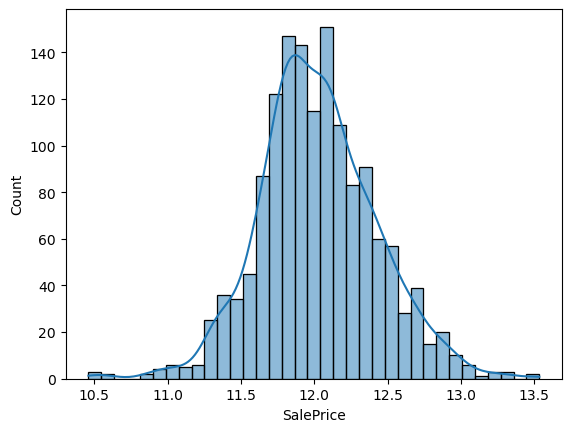

In [143]:
#checking our columns after outliers removal.
for i in cols_num_con:
    train_df[i] = np.log(train_df[i]+1)
    sns.histplot(train_df[i], kde=True)
    plt.show()

In [145]:
train_df[cols_num_con].head()

MSSubClass  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0    4.110874     4.189655  9.042040    5.283204    6.561031         0.0   
1    3.044522     4.394449  9.169623    0.000000    6.886532         0.0   
2    4.110874     4.234107  9.328212    5.093750    6.188264         0.0   
3    4.262680     4.110874  9.164401    0.000000    5.379897         0.0   
4    4.110874     4.442651  9.565284    5.860786    6.486161         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0   5.017280     6.753438  6.753438  6.751101           0.0   7.444833   
1   5.652489     7.141245  7.141245  0.000000           0.0   7.141245   
2   6.075346     6.825460  6.825460  6.765039           0.0   7.488294   
3   6.293419     6.629363  6.869014  6.629363           0.0   7.448916   
4   6.196444     7.044033  7.044033  6.960348           0.0   7.695758   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    6.308098    0.000000     4.127134       0.000000        0.0          0.0   
1    6.133398    5.700444     0.000000       0.000000        0.0          0.0   
2    6.411818    0.000000     3.761200       0.000000        0.0          0.0   
3    6.466145    0.000000     3.583519       5.609472        0.0          0.0   
4    6.729824    5.262690     4.442651       0.000000        0.0          0.0   

   MiscVal  SalePrice  
0      0.0  12.247699  
1      0.0  12.109016  
2      0.0  12.317171  
3      0.0  11.849405  
4      0.0  12.429220

In [147]:
cols_num_com = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal']
for i in cols_num_com:
    test_df[i] = np.log(test_df[i]+1)

###  (b) Handling Discrete Numerical Variables

In [151]:
train_df[cols_num_dis].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

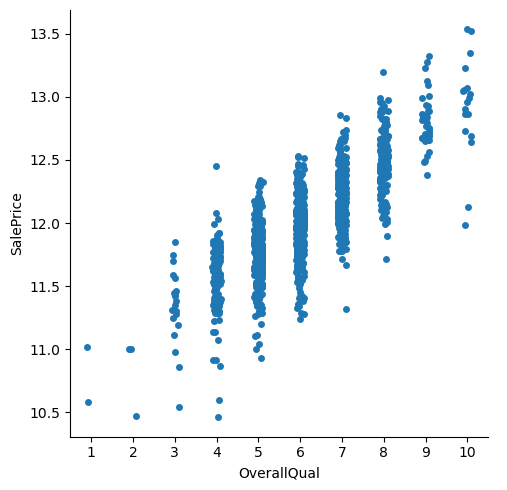

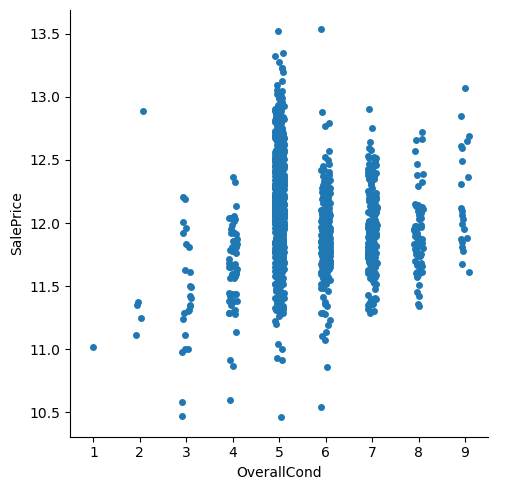

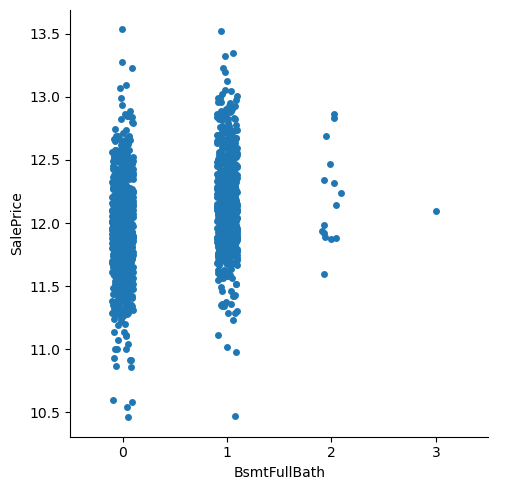

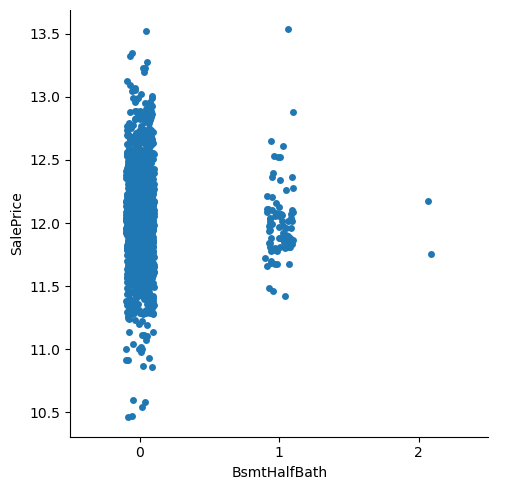

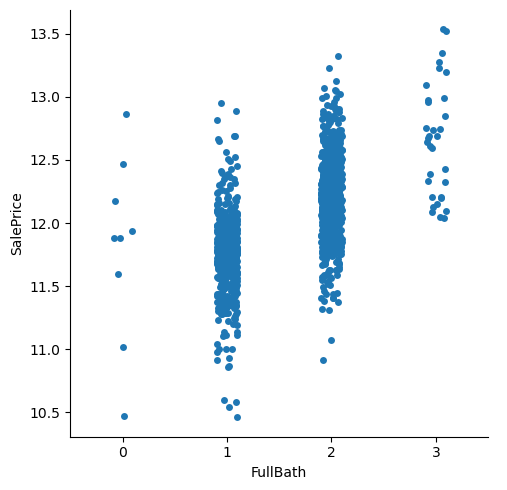

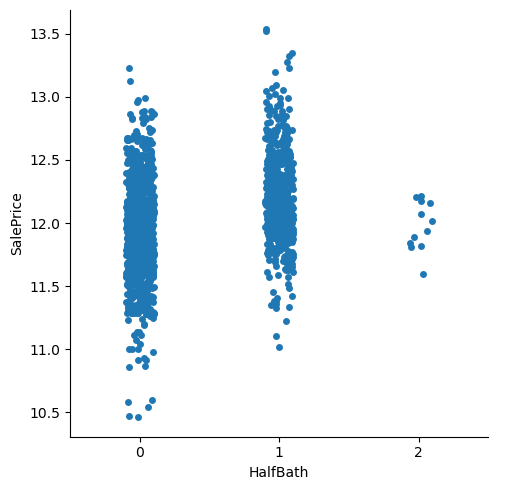

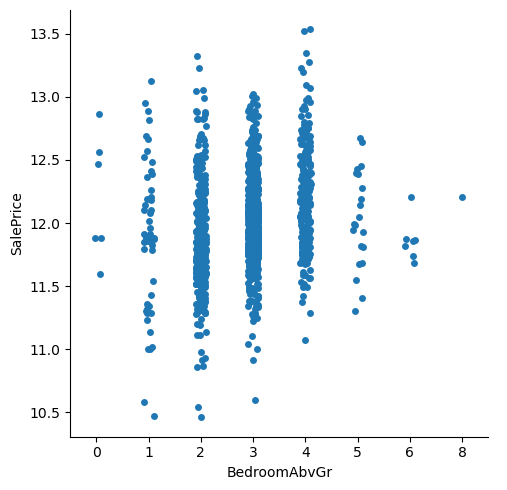

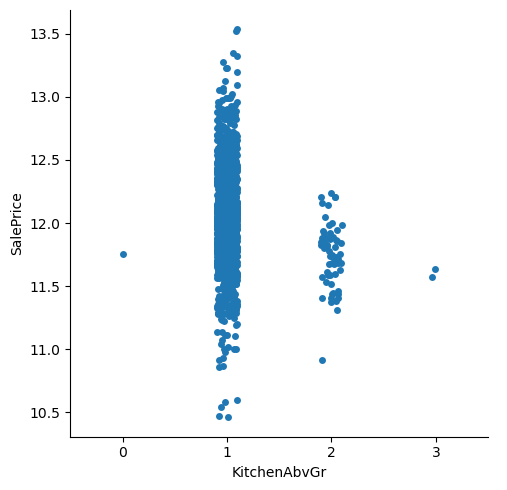

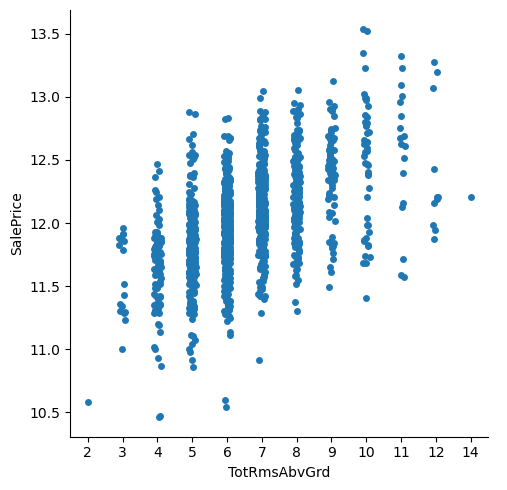

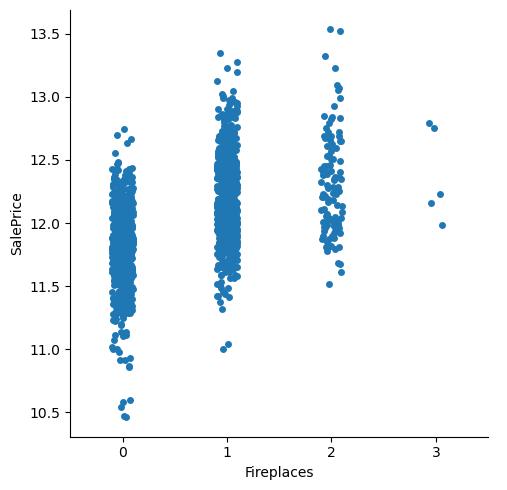

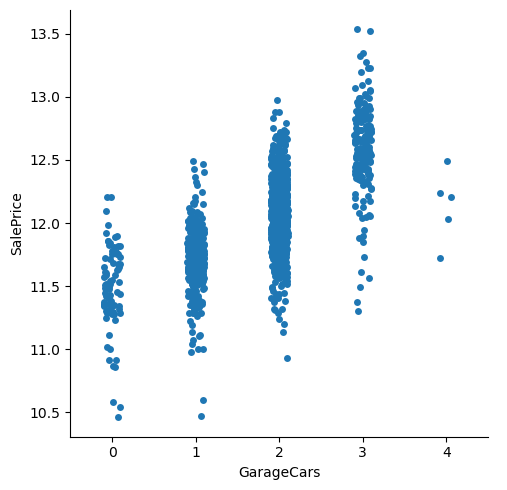

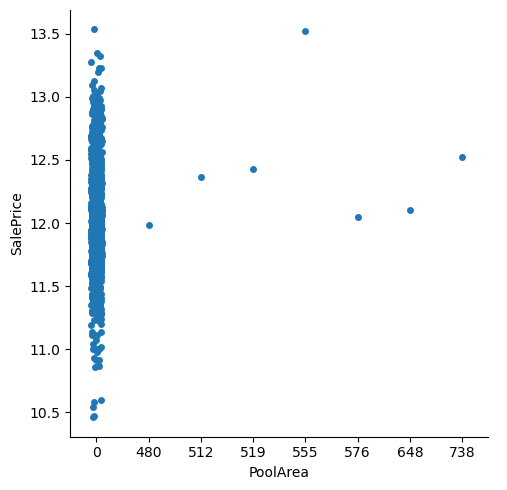

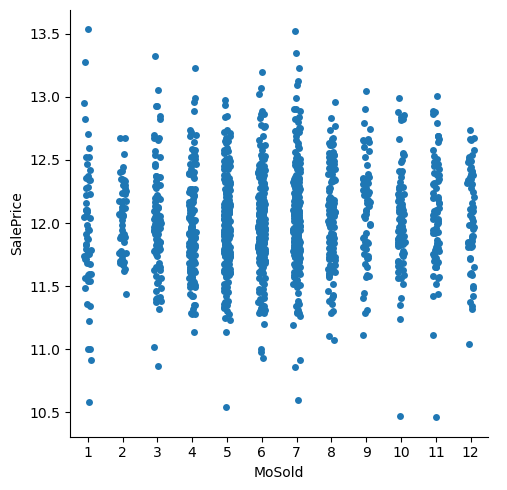

In [153]:
for i in cols_num_dis:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

### (c) Handling Year Variables

In [156]:
train_df[year_cols].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

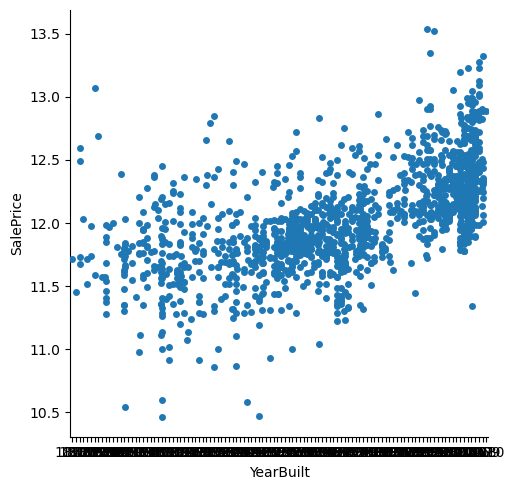

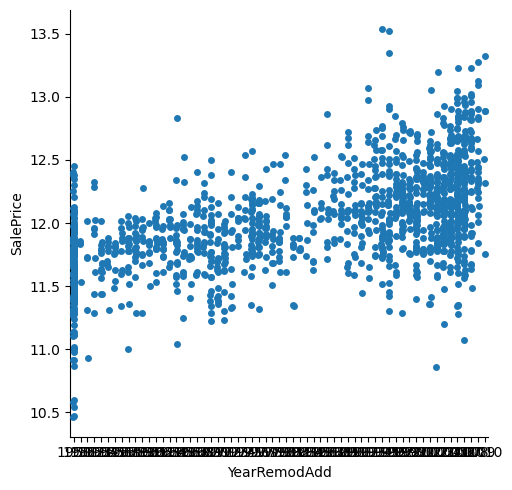

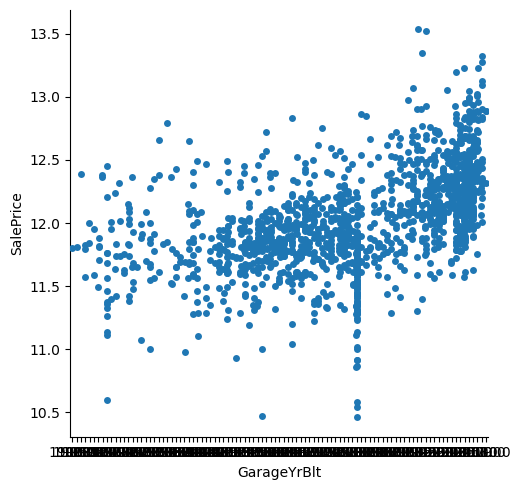

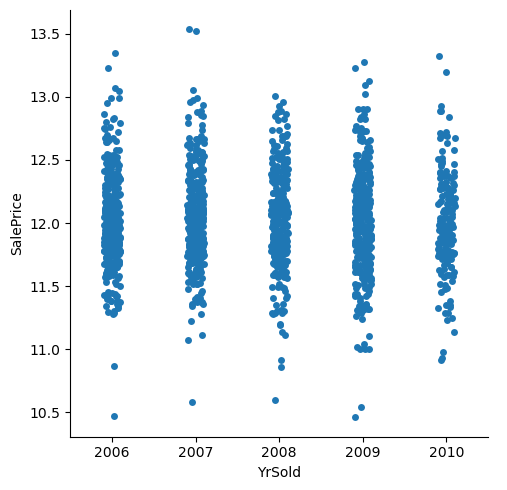

In [158]:
for i in year_cols:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

### (d) Handling Categorical Variables

In [161]:
train_df[cols_obj].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 37 columns]

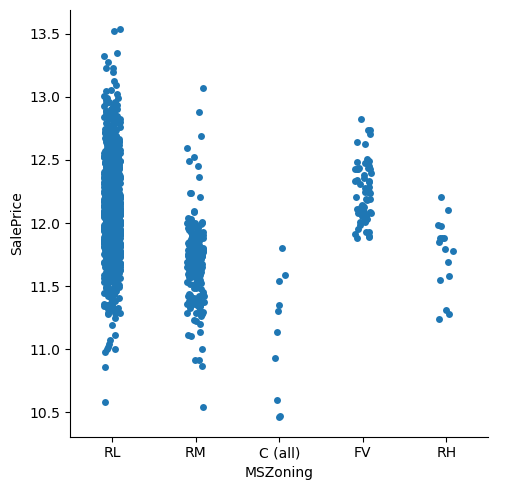

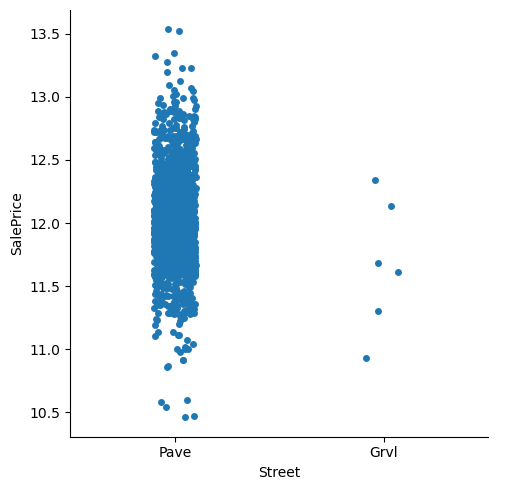

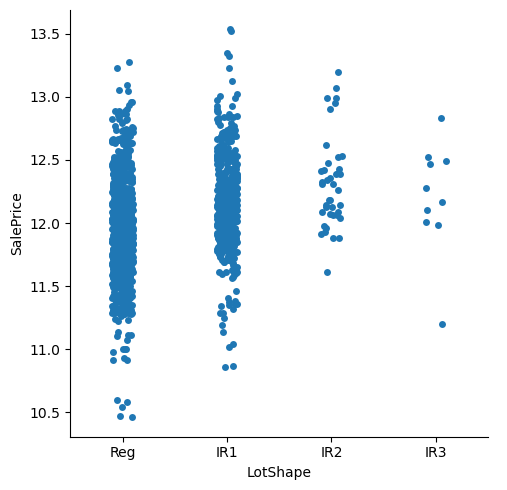

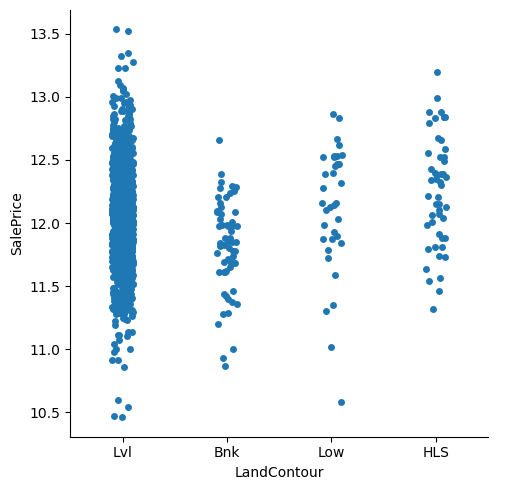

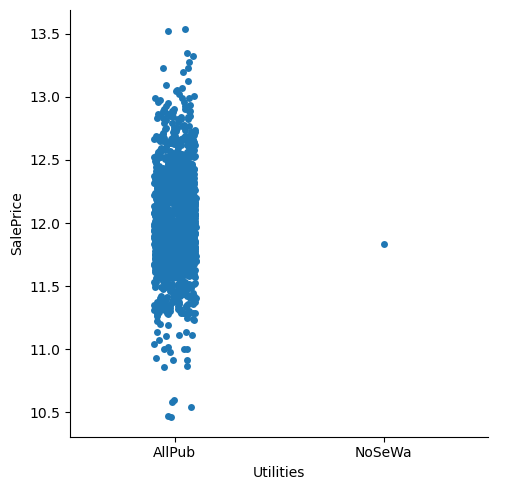

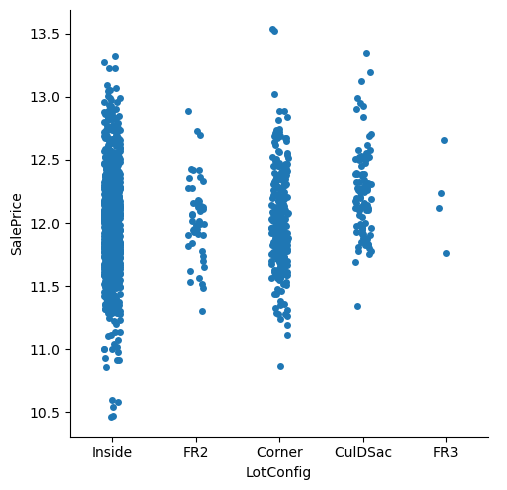

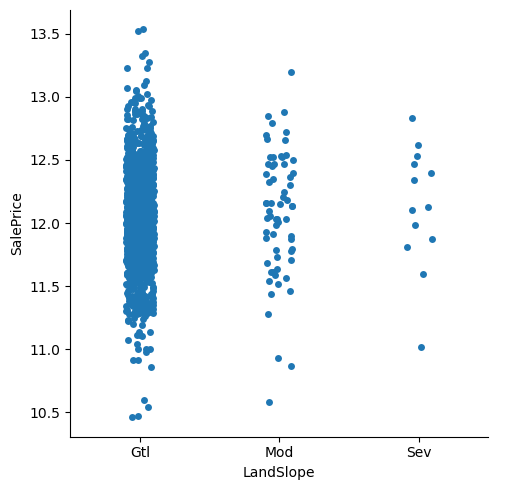

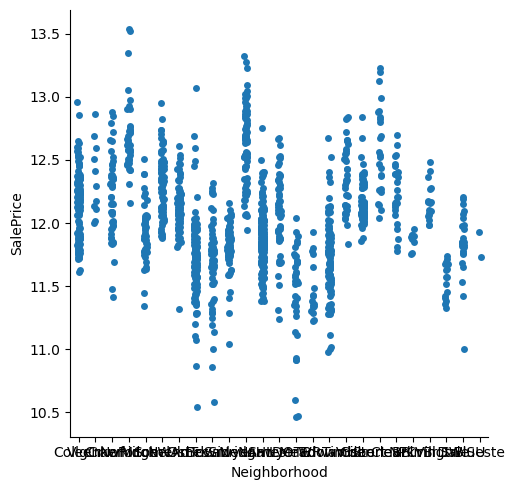

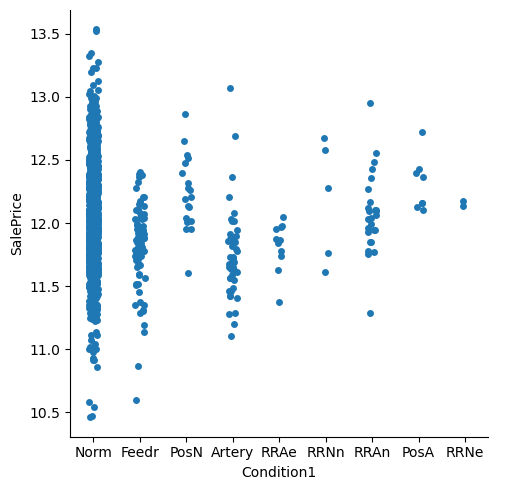

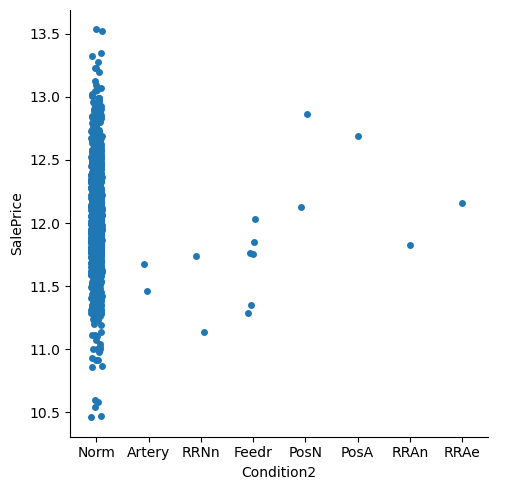

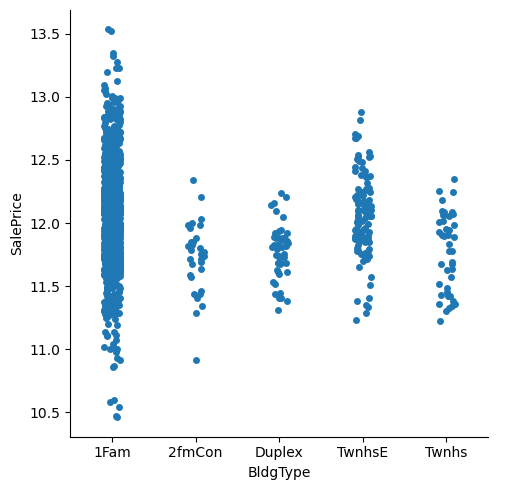

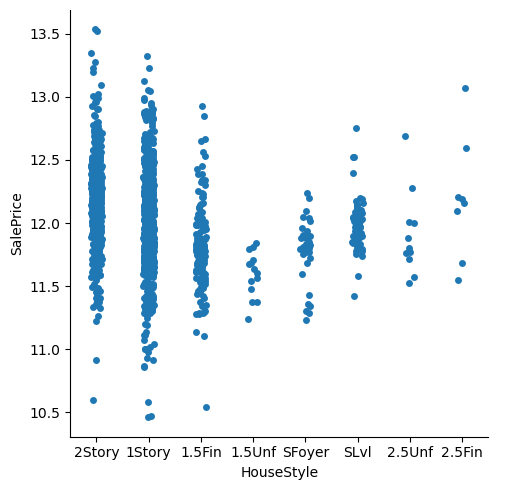

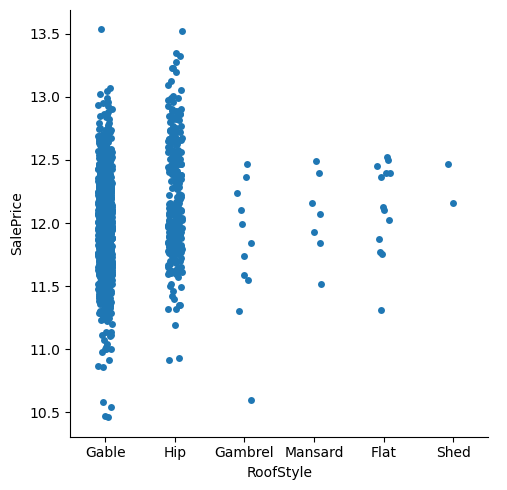

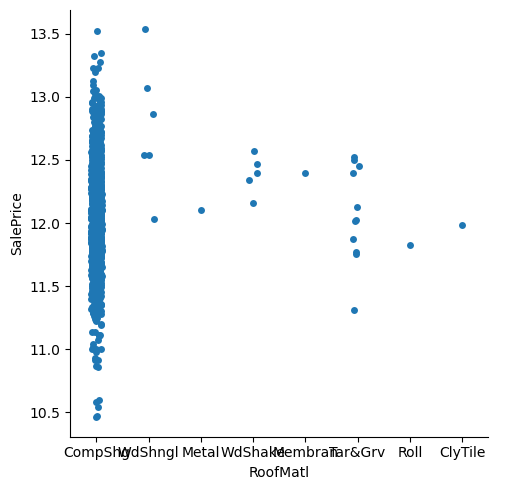

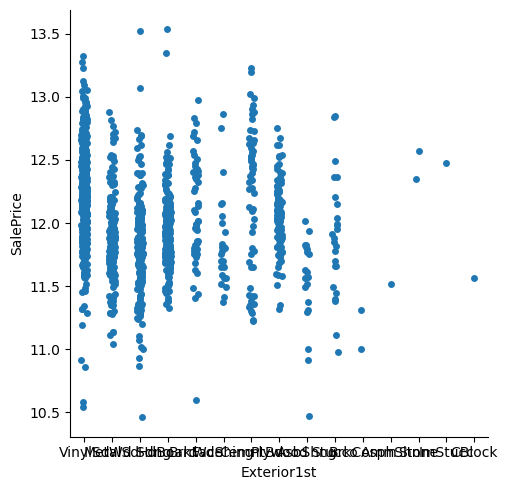

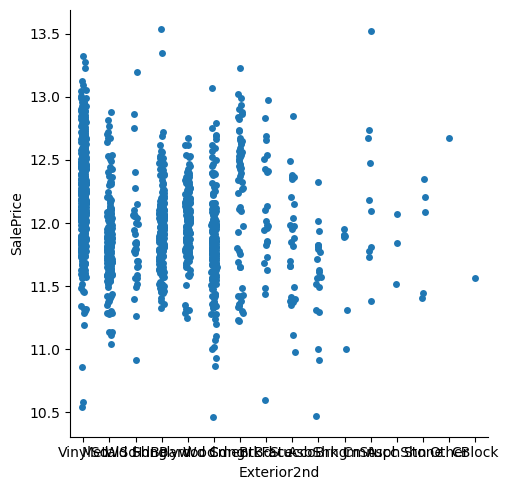

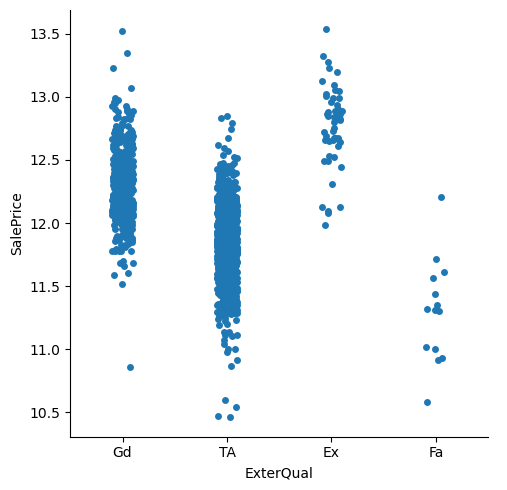

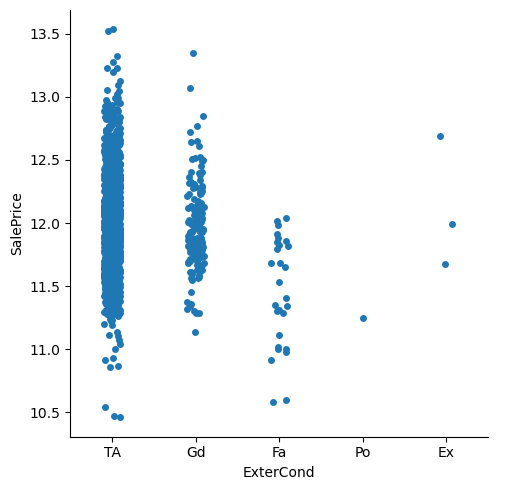

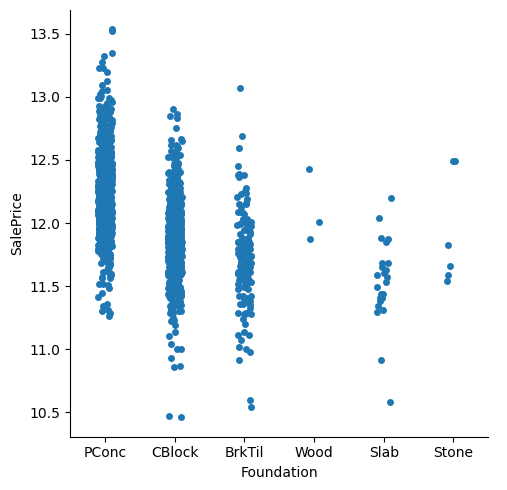

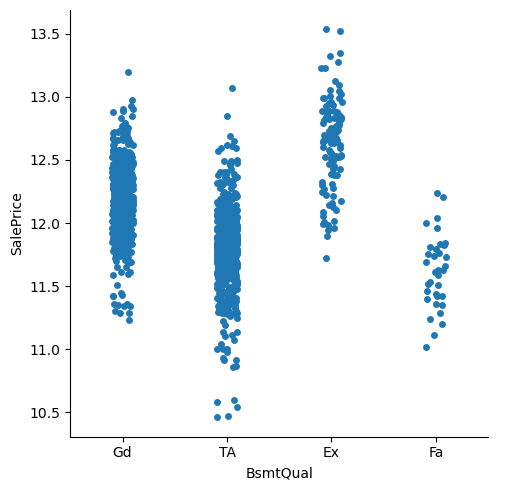

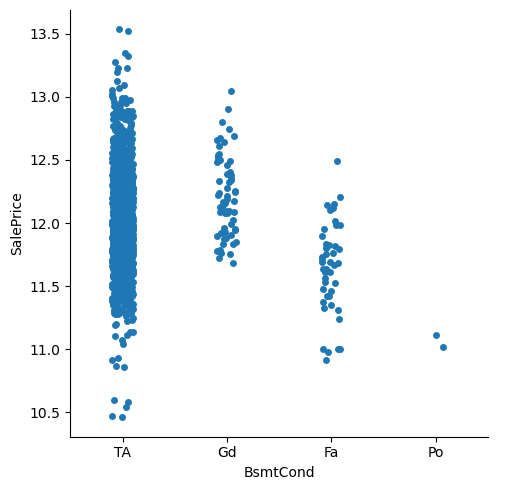

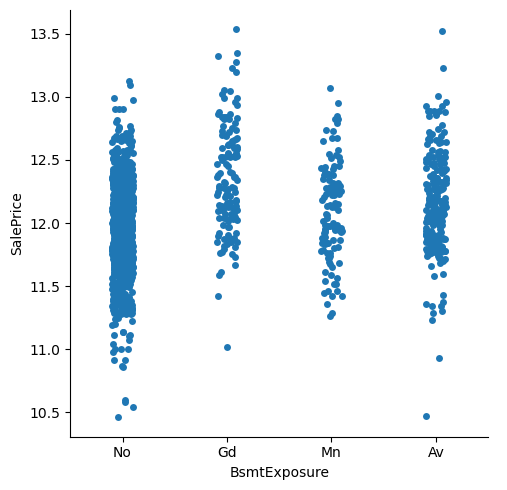

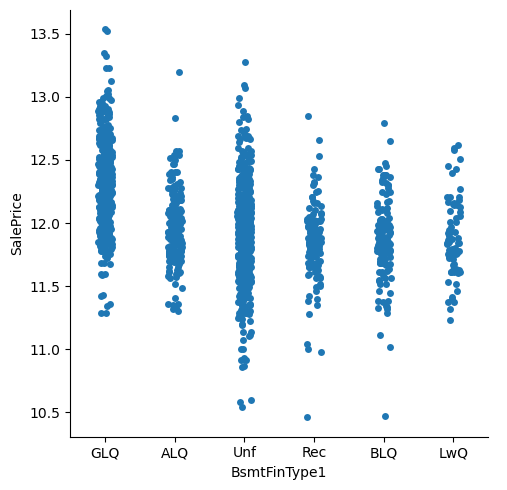

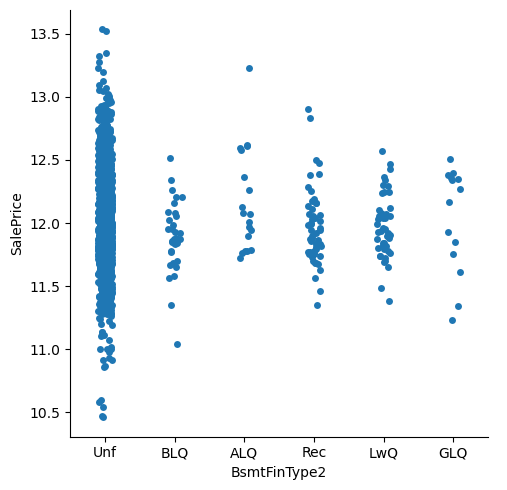

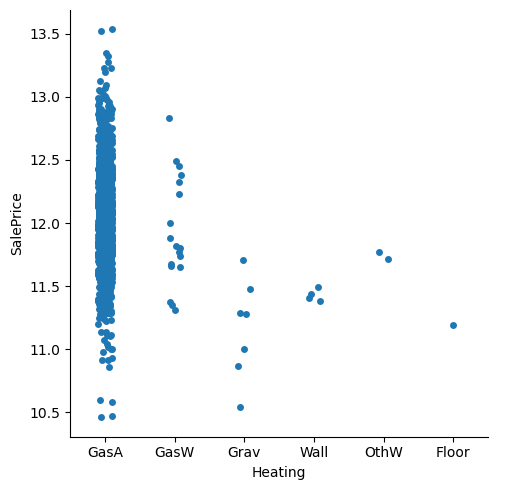

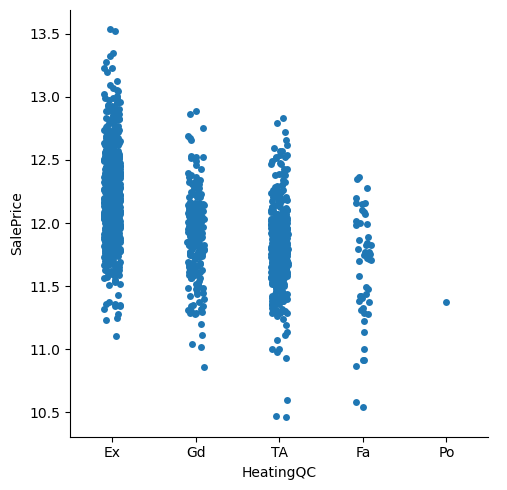

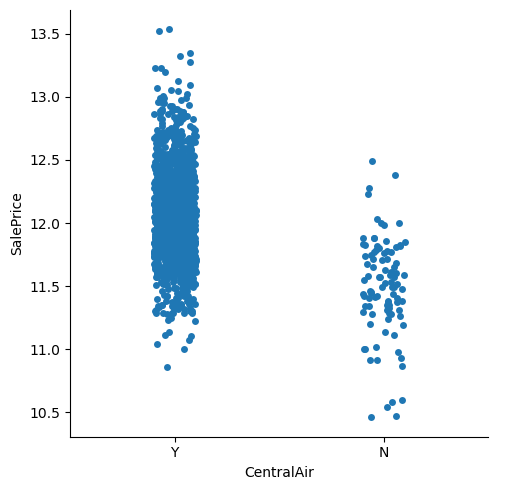

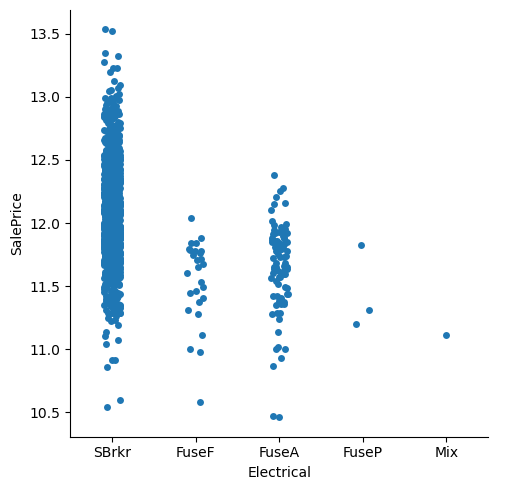

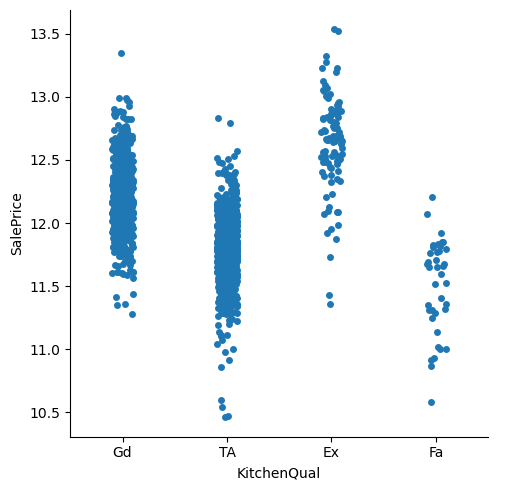

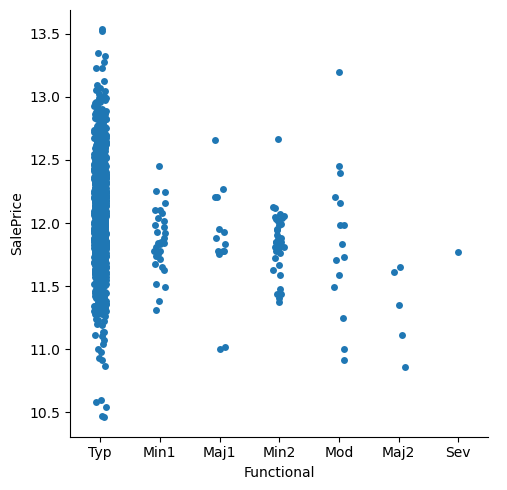

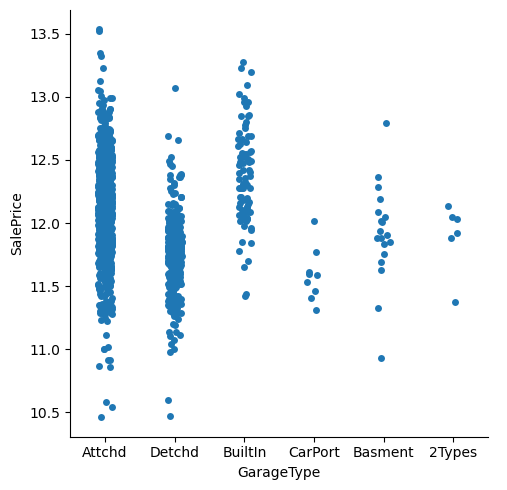

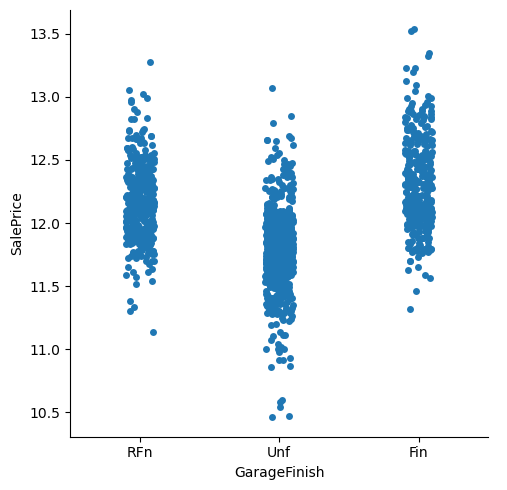

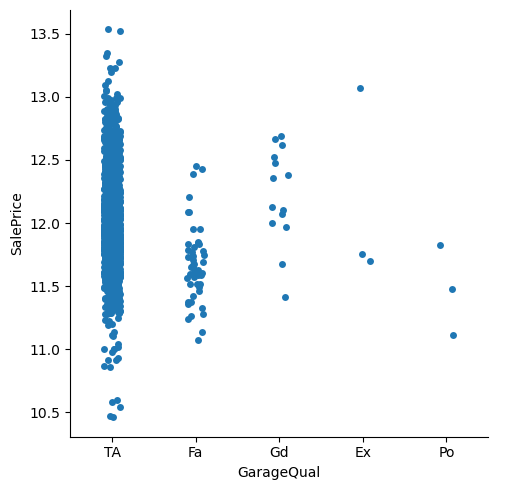

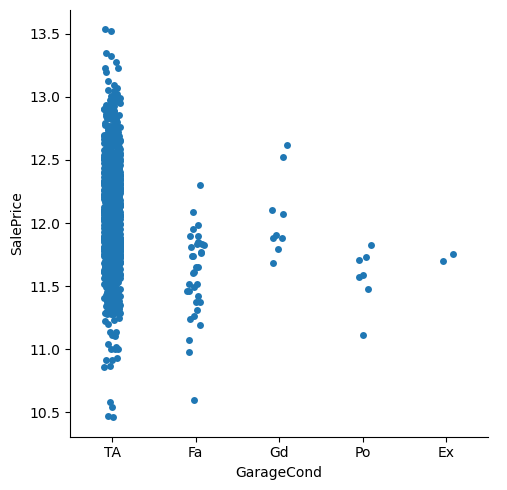

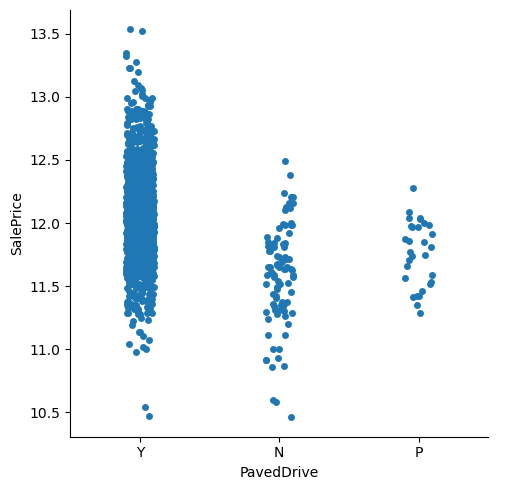

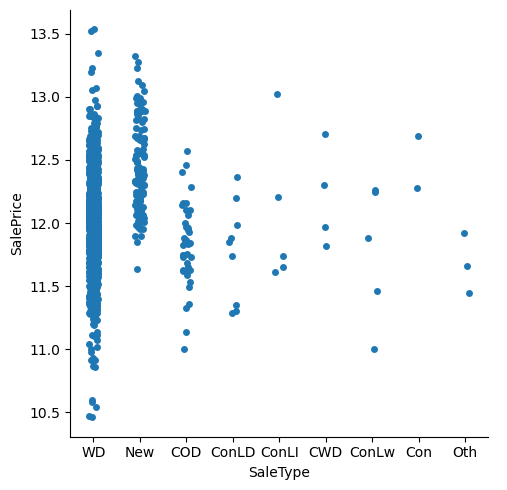

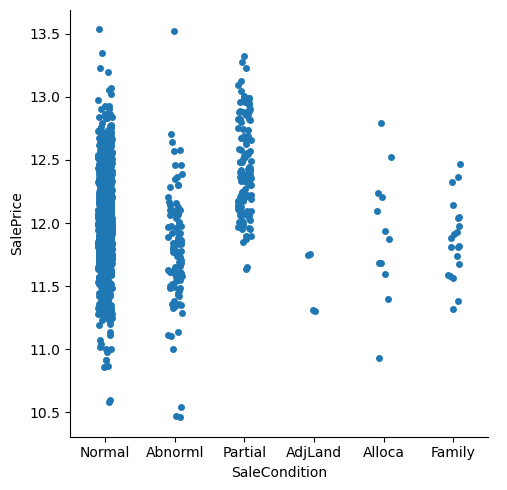

In [163]:
for i in cols_obj:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

In [165]:
for i in cols_obj:
    print(train_df[i].value_counts(normalize=True)*100)
    print()

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: proportion, dtype: float64

Street
Pave    99.589041
Grvl     0.410959
Name: proportion, dtype: float64

LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: proportion, dtype: float64

LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: proportion, dtype: float64

Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: proportion, dtype: float64

LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: proportion, dtype: float64

LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: proportion, dtype: float64

Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096

In [175]:
train_df.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1, inplace=True)
test_df.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1, inplace=True)

In [181]:
MSZoning = train_df.groupby(['MSZoning']).SalePrice.agg([len, min, max])
MSZoning

len        min        max
MSZoning                            
C (all)     10  10.460271  11.804856
FV          65  11.878631  12.823631
RH          16  11.238502  12.206078
RL        1151  10.579005  13.534474
RM         218  10.542733  13.071072

In [183]:
train_df['MSZoning'] = np.where((train_df.MSZoning=='RL' ), 1, 0)

test_df['MSZoning'] = np.where((test_df.MSZoning=='RL' ), 1, 0)

In [185]:
LotShape = train_df.groupby(['LotShape']).SalePrice.agg([len, min, max])
LotShape

len        min        max
LotShape                           
IR1       484  10.859018  13.534474
IR2        41  11.608245  13.195616
IR3        10  11.198228  12.834684
Reg       925  10.460271  13.275829

In [187]:
train_df['LotShape'] = np.where((train_df.LotShape=='Reg' ), 1, 0)

test_df['LotShape'] = np.where((test_df.LotShape=='Reg' ), 1, 0)

In [189]:
LandContour = train_df.groupby(['LandContour']).SalePrice.agg([len, min, max])
LandContour

len        min        max
LandContour                            
Bnk            63  10.868587  12.660331
HLS            50  11.320566  13.195616
Low            36  10.579005  12.861001
Lvl          1311  10.460271  13.534474

In [191]:
train_df['LandContour'] = np.where((train_df.LandContour=='Lvl' ), 1, 0)

test_df['LandContour'] = np.where((test_df.LandContour=='Lvl' ), 1, 0)

In [193]:
LotConfig = train_df.groupby(['LotConfig']).SalePrice.agg([len, min, max])
LotConfig


len        min        max
LotConfig                            
Corner      263  10.868587  13.534474
CulDSac      94  11.338584  13.345509
FR2          47  11.302217  12.885673
FR3           4  11.759793  12.660331
Inside     1052  10.460271  13.323929

In [195]:
train_df['LotConfig'] = np.where((train_df.LotConfig=='Inside' ), 1, 0)

test_df['LotConfig'] = np.where((test_df.LotConfig=='Inside' ), 1, 0)

In [197]:
Condition1 = train_df.groupby(['Condition1']).SalePrice.agg([len, min, max])
Condition1

len        min        max
Condition1                            
Artery        48  11.104972  13.071072
Feedr         81  10.596660  12.407384
Norm        1260  10.460271  13.534474
PosA           8  12.100718  12.721889
PosN          19  11.603689  12.861001
RRAe          11  11.373675  12.049425
RRAn          26  11.283525  12.955130
RRNe           2  12.138869  12.178193
RRNn           5  11.608245  12.676079

In [199]:
train_df['Condition1'] = np.where((train_df.Condition1=='Norm' ), 1, 0)

test_df['Condition1'] = np.where((test_df.Condition1=='Norm' ), 1, 0)

In [201]:
BldgType = train_df.groupby(['BldgType']).SalePrice.agg([len, min, max])
BldgType

len        min        max
BldgType                            
1Fam      1220  10.460271  13.534474
2fmCon      31  10.915107  12.341263
Duplex      52  11.314487  12.237092
Twnhs       43  11.225257  12.345839
TwnhsE     114  11.231901  12.880294

In [203]:
train_df['BldgType'] = np.where((train_df.BldgType=='1Fam' ), 1, 0)

test_df['BldgType'] = np.where((test_df.BldgType=='1Fam' ), 1, 0)

In [205]:
RoofStyle = train_df.groupby(['RoofStyle']).SalePrice.agg([len, min, max])
RoofStyle

len        min        max
RoofStyle                            
Flat         13  11.314487  12.524421
Gable      1141  10.460271  13.534474
Gambrel      11  10.596660  12.466516
Hip         286  10.915107  13.521141
Mansard       7  11.512935  12.491176
Shed          2  12.154785  12.468441

In [207]:
train_df['RoofStyle'] = np.where((train_df.RoofStyle=='Gable' ), 1, 0)

test_df['RoofStyle'] = np.where((test_df.RoofStyle=='Gable' ), 1, 0)

In [211]:
ExterQual = train_df.groupby(['ExterQual']).SalePrice.agg([len, min, max])
ExterQual

len        min        max
ExterQual                           
Ex          52  11.982935  13.534474
Fa          14  10.579005  12.206078
Gd         488  10.859018  13.521141
TA         906  10.460271  12.850557

In [213]:
train_df['ExterQual'] = np.where((train_df.ExterQual=='Ex' ), 'Gd', train_df.ExterQual)
train_df['ExterQual'] = np.where((train_df.ExterQual=='Fa' ), 'TA', train_df.ExterQual)
train_df['ExterQual'] = np.where((train_df.ExterQual=='TA' ), 1, 0)

test_df['ExterQual'] = np.where((test_df.ExterQual=='Ex' ), 'Gd', test_df.ExterQual)
test_df['ExterQual'] = np.where((test_df.ExterQual=='Fa' ), 'TA', test_df.ExterQual)
test_df['ExterQual'] = np.where((test_df.ExterQual=='TA' ), 1, 0)

In [215]:
ExterCond = train_df.groupby(['ExterCond']).SalePrice.agg([len, min, max])
ExterCond

len        min        max
ExterCond                            
Ex            3  11.678448  12.691584
Fa           28  10.579005  12.040614
Gd          146  11.133143  13.345509
Po            1  11.245059  11.245059
TA         1282  10.460271  13.534474

In [217]:
train_df['ExterCond'] = np.where((train_df.ExterCond=='TA' ), 1, 0)

test_df['ExterCond'] = np.where((test_df.ExterCond=='TA' ), 1, 0)

In [219]:
Foundation = train_df.groupby(['Foundation']).SalePrice.agg([len, min, max])
Foundation

len        min        max
Foundation                           
BrkTil      146  10.542733  13.071072
CBlock      634  10.460271  12.906349
PConc       647  11.264477  13.534474
Slab         24  10.579005  12.198549
Stone         6  11.540317  12.493133
Wood          3  11.870607  12.429220

In [221]:
train_df['Foundation'] = np.where((train_df.Foundation=='PConc' ), 1, 0)

test_df['Foundation'] = np.where((test_df.Foundation=='PConc' ), 1, 0)

In [223]:
BsmtQual = train_df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])
BsmtQual

len        min        max
BsmtQual                           
Ex        121  11.724005  13.534474
Fa         35  11.018646  12.239996
Gd        618  11.231901  13.195616
TA        686  10.460271  13.071072

In [225]:
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='Ex' ), 'Gd', train_df.BsmtQual)
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='Fa' ), 'TA', train_df.BsmtQual)
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='TA' ), 1, 0)

test_df['BsmtQual'] = np.where((test_df.BsmtQual=='Ex' ), 'Gd', test_df.BsmtQual)
test_df['BsmtQual'] = np.where((test_df.BsmtQual=='Fa' ), 'TA', test_df.BsmtQual)
test_df['BsmtQual'] = np.where((test_df.BsmtQual=='TA' ), 1, 0)

In [227]:
BsmtExposure = train_df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])
BsmtExposure

len        min        max
BsmtQual                           
0         739  11.231901  13.534474
1         721  10.460271  13.071072

In [229]:
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='Mn' ), 'No', train_df.BsmtExposure)
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='Gd' ), 'Av', train_df.BsmtExposure)
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='No' ), 1, 0)

test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='Mn' ), 'No', test_df.BsmtExposure)
test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='Gd' ), 'Av', test_df.BsmtExposure)
test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='No' ), 1, 0)

In [231]:
GarageType = train_df.groupby(['GarageType']).SalePrice.agg([len, min, max])
GarageType

len        min        max
GarageType                           
2Types        6  11.373675  12.137264
Attchd      951  10.460271  13.534474
Basment      19  10.933000  12.791359
BuiltIn      88  11.418626  13.275829
CarPort       9  11.314487  12.013101
Detchd      387  10.471978  13.071072

In [233]:
train_df['GarageType'] = np.where((train_df.GarageType=='Attchd' ), 1, 0)

test_df['GarageType'] = np.where((test_df.GarageType=='Attchd' ), 1, 0)

In [235]:
SaleType = train_df.groupby(['SaleType']).SalePrice.agg([len, min, max])
SaleType

len        min        max
SaleType                            
COD         43  11.002117  12.567241
CWD          4  11.820418  12.703512
Con          2  12.279328  12.688502
ConLD        9  11.288544  12.367890
ConLI        5  11.608245  13.021329
ConLw        5  11.002117  12.264346
New        122  11.635152  13.323929
Oth          3  11.445727  11.918397
WD        1267  10.460271  13.534474

In [237]:
train_df['SaleType'] = np.where((train_df.SaleType=='WD' ), 1, 0)

test_df['SaleType'] = np.where((test_df.SaleType=='WD' ), 1, 0)

In [239]:
SaleCondition = train_df.groupby(['SaleCondition']).SalePrice.agg([len, min, max])
SaleCondition

len        min        max
SaleCondition                            
Abnorml         101  10.460271  13.521141
AdjLand           4  11.302217  11.755879
Alloca           12  10.933000  12.791359
Family           20  11.320566  12.464587
Normal         1198  10.579005  13.534474
Partial         125  11.635152  13.323929

In [241]:
train_df['SaleCondition'] = np.where((train_df.SaleCondition=='Normal' ), 1, 0)

test_df['SaleCondition'] = np.where((test_df.SaleCondition=='Normal' ), 1, 0)

In [247]:
#GarageFinish, KitchenQual, HeatingQC, BsmtFinType2, BsmtFinType1, Exterior2nd, Exterior1st, HouseStyle, Neighborhood

In [251]:
train_df.drop(['Neighborhood'], axis=1,inplace=True)

test_df.drop(['Neighborhood'], axis=1,inplace=True)


In [267]:
train_df.drop(['BsmtFinType1'], axis=1,inplace=True)

test_df.drop(['BsmtFinType1'], axis=1,inplace=True)


In [273]:
train_df.drop(['Exterior1st'], axis=1,inplace=True)

test_df.drop(['Exterior1st'], axis=1,inplace=True)

In [275]:
train_df.drop(['Exterior2nd'], axis=1,inplace=True)

test_df.drop(['Exterior2nd'], axis=1,inplace=True)

In [279]:
train_df.drop(['HouseStyle'], axis=1,inplace=True)

test_df.drop(['HouseStyle'], axis=1,inplace=True)

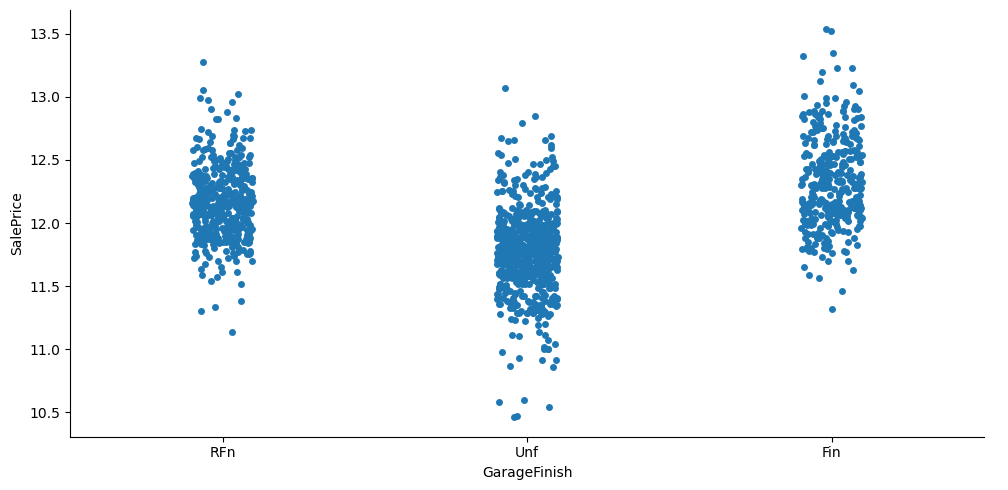

In [253]:
ax = sns.catplot(x = 'GarageFinish', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [255]:
train_df['GarageFinish'] = np.where((train_df.GarageFinish=='Unf' ), 1, 0)

test_df['GarageFinish'] = np.where((test_df.GarageFinish=='Unf' ), 1, 0)

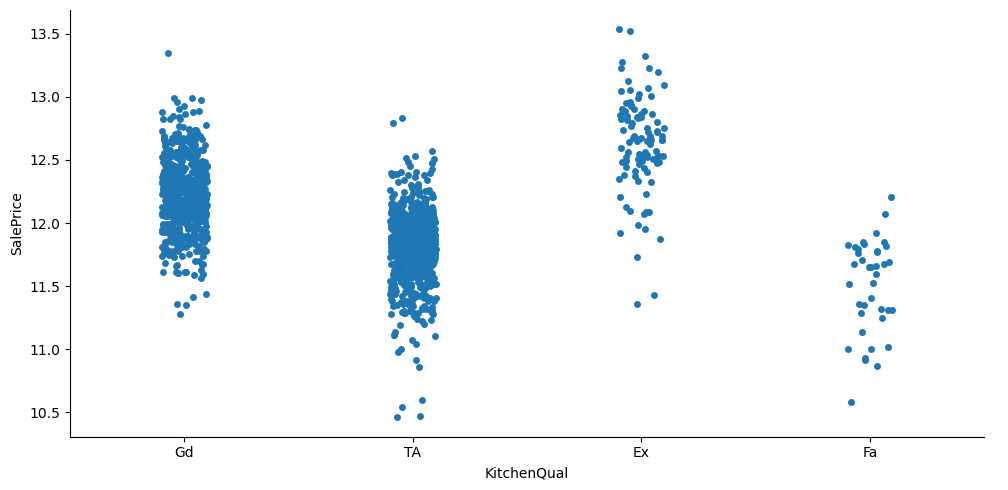

In [257]:
ax = sns.catplot(x = 'KitchenQual', y = 'SalePrice', data = train_df,height=5, aspect=2)


In [259]:
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='Ex' ), 'Gd', train_df.KitchenQual)
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='Fa' ), 'TA', train_df.KitchenQual)
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='TA' ), 1, 0)

test_df['KitchenQual'] = np.where((test_df.KitchenQual=='Ex' ), 'Gd', test_df.KitchenQual)
test_df['KitchenQual'] = np.where((test_df.KitchenQual=='Fa' ), 'TA', test_df.KitchenQual)
test_df['KitchenQual'] = np.where((test_df.KitchenQual=='TA' ), 1, 0)

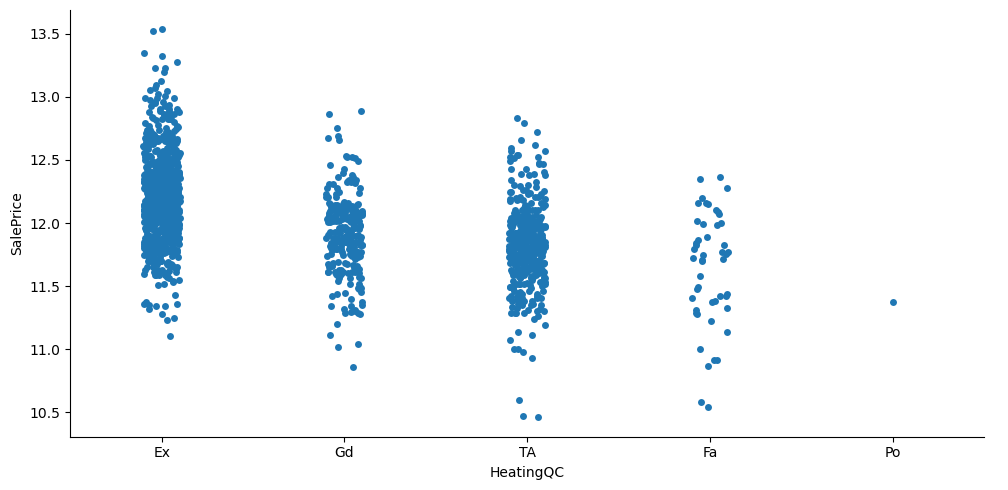

In [261]:
ax = sns.catplot(x = 'HeatingQC', y = 'SalePrice', data = train_df,height=5, aspect=2)


In [263]:
train_df['HeatingQC'] = np.where((train_df.HeatingQC=='Ex' ), 1, 0)

test_df['HeatingQC'] = np.where((test_df.HeatingQC=='Ex' ), 1, 0)

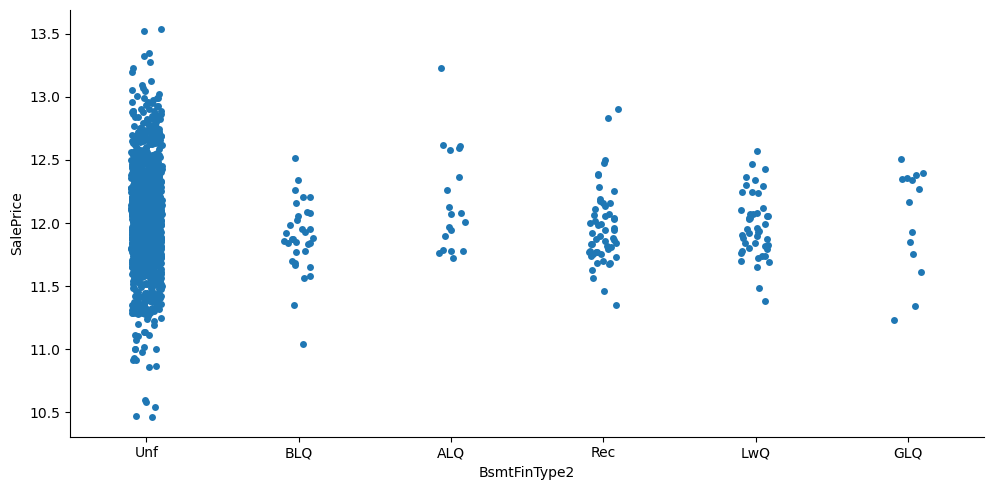

In [269]:
ax = sns.catplot(x = 'BsmtFinType2', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [271]:
train_df['BsmtFinType2'] = np.where((train_df.BsmtFinType2=='Unf' ), 1, 0)

test_df['BsmtFinType2'] = np.where((test_df.BsmtFinType2=='Unf' ), 1, 0)

### Duplicate Columns

In [282]:
#checking for duplicate rows
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Condition1, BldgType, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtExposure, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 56 columns]

In [284]:
test_df[test_df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Condition1, BldgType, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtExposure, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 55 columns]

In [286]:
train_df.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0    4.110874         1     4.189655  9.042040         1            1   
1    3.044522         1     4.394449  9.169623         1            1   
2    4.110874         1     4.234107  9.328212         0            1   
3    4.262680         1     4.110874  9.164401         0            1   
4    4.110874         1     4.442651  9.565284         0            1   

   LotConfig  Condition1  BldgType  OverallQual  ...  EnclosedPorch  \
0          1           1         1            7  ...       0.000000   
1          0           0         1            6  ...       0.000000   
2          1           1         1            7  ...       0.000000   
3          0           1         1            7  ...       5.609472   
4          0           1         1            8  ...       0.000000   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0        0.0          0.0         0      0.0       2    2008         1   
1        0.0          0.0         0      0.0       5    2007         1   
2        0.0          0.0         0      0.0       9    2008         1   
3        0.0          0.0         0      0.0       2    2006         1   
4        0.0          0.0         0      0.0      12    2008         1   

   SaleCondition  SalePrice  
0              1  12.247699  
1              1  12.109016  
2              1  12.317171  
3              0  11.849405  
4              1  12.429220  

[5 rows x 56 columns]

###  Feature Scaling

In [289]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(train_df) 
scaler.fit(test_df)


StandardScaler()

### Mulitcolinearity

In [292]:
X1 = train_df.drop(['SalePrice'], axis=1)


In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            2.498224e+06
MSSubClass       5.576920e+00
MSZoning         1.709036e+00
LotFrontage      2.211052e+00
LotArea          2.851430e+00
LotShape         1.350399e+00
LandContour      1.175583e+00
LotConfig        1.131219e+00
Condition1       1.099597e+00
BldgType         5.270824e+00
OverallQual      3.650165e+00
OverallCond      1.766048e+00
YearBuilt        7.262981e+00
YearRemodAdd     2.792298e+00
RoofStyle        1.232585e+00
MasVnrArea       1.519403e+00
ExterQual        3.137283e+00
ExterCond        1.142681e+00
Foundation       2.834474e+00
BsmtQual         3.166640e+00
BsmtExposure     1.577510e+00
BsmtFinSF1       2.218839e+00
BsmtFinType2     3.551521e+01
BsmtFinSF2       3.590188e+01
BsmtUnfSF        2.475699e+00
TotalBsmtSF      2.429309e+00
HeatingQC        1.729000e+00
1stFlrSF         1.768804e+01
2ndFlrSF         1.963043e+01
LowQualFinSF     1.405324e+00
GrLivArea        3.028840e+01
BsmtFullBath     2.076713e+00
BsmtHalfBath     1.176270e+00
FullBath  

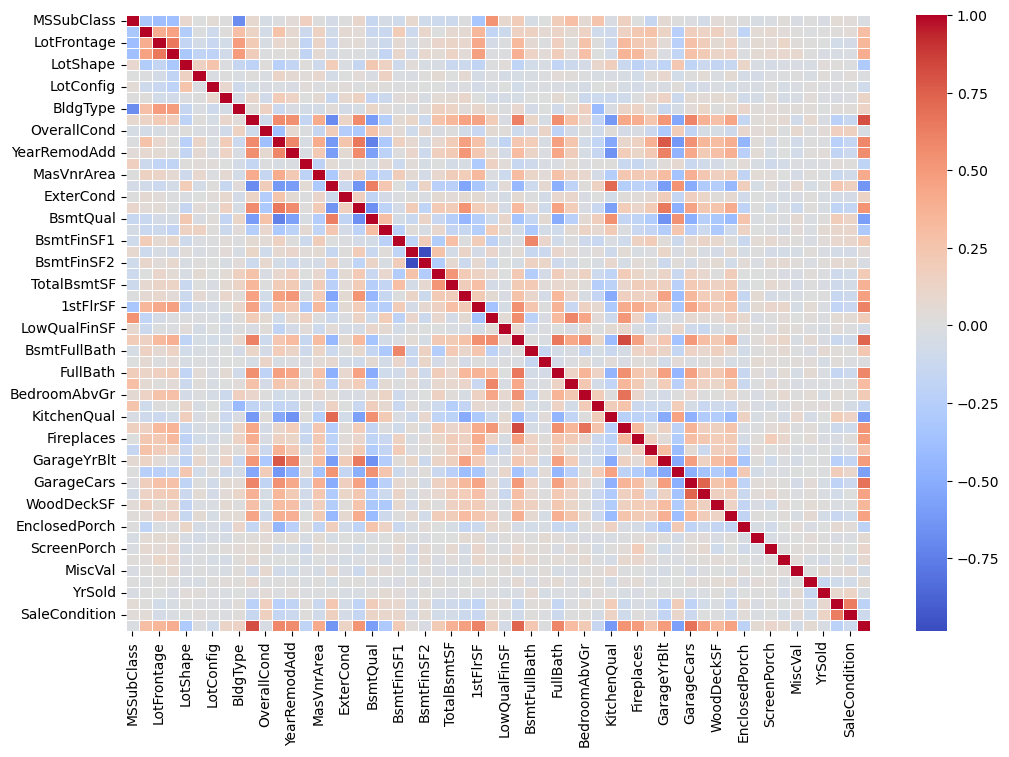

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()


## Train-Test Split

In [308]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (978, 55) (978,)
Test (482, 55) (482,)


In [310]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.1, random_state=4)

## Model Evaluation

### a) Linear Regression

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predicted = LR.predict(X_test)

print(round(LR.score(X_train, y_train)*100,2))
print(round(LR.score(X_test, y_test)*100,2))
print("MSE:", mean_squared_error(y_test, y_predicted, squared=False))

89.34
94.11
MSE: 0.10644775580070527


### b) Regularization

#### Lasso Regression

In [327]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to normalize the data
    ('lasso', Lasso())
])

# Define the parameters for grid search
parameters = {
    'lasso__alpha': [0, 0.1, 0.5, 1, 5, 10]
}

# Initialize GridSearchCV
Lasso_reg = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=20)
Lasso_reg.fit(X_train, y_train)

# Best estimator
print(Lasso_reg.best_estimator_)

# Best model
best_model = Lasso_reg.best_estimator_
best_model.fit(X_train, y_train)
y_predicted = best_model.predict(X_test)

# Print the results
print(best_model.score(X_train, y_train) * 100)
print("MSE:", mean_squared_error(y_test, y_predicted, squared=False))


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0))])
89.34224288738741
MSE: 0.10644775580070506


#### Ridge

In [330]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to normalize the data
    ('ridge', Ridge())
])

# Define the parameters for grid search
parameters = {
    'ridge__alpha': [0, 0.1, 0.5, 1, 5, 10]
}

# Initialize GridSearchCV
Ridge_reg = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=20)
Ridge_reg.fit(X_train, y_train)

# Best estimator
print(Ridge_reg.best_estimator_)

# Best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train, y_train)
y_predicted = best_model.predict(X_test)

# Print the results
print(best_model.score(X_train, y_train) * 100)
print("MSE:", mean_squared_error(y_test, y_predicted, squared=False))


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10))])
89.3188693802497
MSE: 0.1068574713927687


### SVR

In [333]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

svr = make_pipeline(RobustScaler(), SVR(kernel ='rbf' ,C= 20))
svr.fit(X_train,y_train)
y_predicted = svr.predict(X_test)
print(svr.score(X_train,y_train)*100)
print("MSE:", mean_squared_error(y_test, y_predicted, squared=False))

91.70627556851927
MSE: 0.09796392822576831


###  Decision Tree

In [338]:
from sklearn.tree import DecisionTreeRegressor

Dt = DecisionTreeRegressor(criterion='squared_error',max_depth=15, min_samples_split=5, min_samples_leaf=5,
                           max_features=None, random_state=42)
Dt.fit(X_train,y_train)
y_predicted = Dt.predict(X_test)
print(Dt.score(X_train,y_train)*100)
print("MSE:", mean_squared_error(y_test, y_predicted, squared=False))

93.71820280672851
MSE: 0.20286191259966316


### Submission CSV

In [341]:
test_df['SalePrice'] = np.exp(svr.predict(test_df))
test_df['Id'] = test_data['Id']
Predicted_outcome=  test_df[['Id','SalePrice']]
Predicted_outcome.to_csv("Predicted_outcome.csv", index=False)
Predicted_outcome.head()

Id      SalePrice
0  1461  106387.881053
1  1462  158773.046219
2  1463  184502.693552
3  1464  202453.721257
4  1465  191522.531181

In [343]:
## Leader Board

place: 1553

score: 0.14079

participants: 4375
